In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import os

/home/affu5154/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


['coors.csv']
['mesh.png']


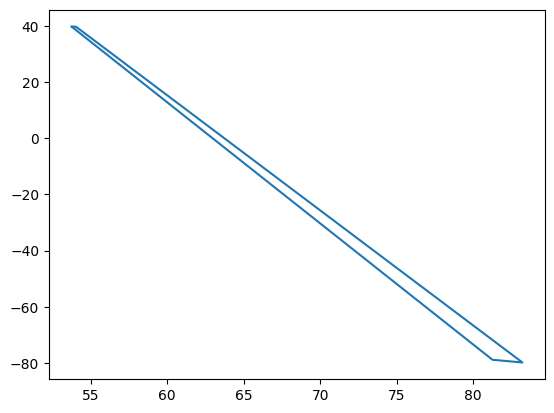

In [5]:
# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Turbine_exit_bend/Left_bend'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)

num_rows = 494;
num_cols = len(csv_files)
num_cases = 1

# Read each CSV file into a DataFrame
coor_y = np.zeros((num_rows, num_cols), dtype = np.float64)
coor_z = np.zeros((num_rows, num_cols), dtype = np.float64)

for idx, file in enumerate(csv_files):
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, skiprows = [0])
    coor_y[:,idx] = df.iloc[:,1]
    coor_z[:,idx] = df.iloc[:,2]


# Specify the folder containing the images
image_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Turbine_exit_bend/Left_bend'  # Replace with your folder path

# List all files in the folder
files_image = os.listdir(image_path)

# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')])
print(png_files)

images = []

# Load the images and store them in the array
for png_file in png_files:
    image_path = os.path.join(folder_path, png_file)
    image = Image.open(image_path)
    images.append(np.array(image))

plt.plot(coor_z[0:5], coor_y[0:5])


## Points via text file

##### Points are all written in a text file to reproduce the projected view accurately. The text file is read, and then the lines are created between the points. Rest of the code follows as usual. 


##### Note that this is unstructured mesh (change transfinite definitions for coarse and refined)

In [189]:
import gmsh
import sys
import meshio
import os

z_coor = 0
lc_set = 1
scale_factor = 1000

def read_points_from_file(filename):
    points = []
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith("Point"):
                parts = line.split("{")[1].split("}")[0].split(",")
                x, y, z, lc = map(float, parts)
                x/= scale_factor
                y/= scale_factor
                z/= scale_factor
                points.append((z, y, z_coor, lc_set))

    return points

def add_points_and_lines_to_gmsh(points):
    gmsh.initialize()
    gmsh.model.add("points_model")

    point_tags = []
    # Add points to Gmsh
    for i, (x, y, z, lc) in enumerate(points, start=1):
        tag_points = gmsh.model.geo.addPoint(x, y, z, lc, i)
        point_tags.append(tag_points)

    print(point_tags)

    # Add lines between successive points
    line_tags = []
    for i in range(len(point_tags) - 1):
            tag_lines = gmsh.model.geo.addLine(point_tags[i], point_tags[i + 1])
            line_tags.append(tag_lines)

    tag_lines = gmsh.model.geo.addLine(point_tags[-1], point_tags[0])
    line_tags.append(tag_lines)

    gmsh.model.geo.synchronize()


    # # # 36k improved
    
    # gmsh.model.geo.mesh.setTransfiniteCurve(43, 100, "Progression", 1) # 50
    # gmsh.model.geo.mesh.setTransfiniteCurve(42, 50, "Progression", 1) # 50

    # # Approximately 0.78 mm / edge length at the outlet (116 mm)
    # gmsh.model.geo.mesh.setTransfiniteCurve(64, 116, "Progression", 1)

    # gmsh.model.geo.mesh.setTransfiniteCurve(158, 25, "Progression", 1)

    # # Approximately 1.8mm / edge length at the inlet (72 mm)
    # gmsh.model.geo.mesh.setTransfiniteCurve(185, 72, "Progression", 1)

    # gmsh.model.geo.mesh.setTransfiniteCurve(174, 3, "Progression", 1)
    # # for l in range(172,189):
    # #     gmsh.model.geo.mesh.setTransfiniteCurve(l, 3, "Progression", 1)
    # for l in range(11,42):
    #     gmsh.model.geo.mesh.setTransfiniteCurve(l, 3, "Progression", 1)
    # for l in range(81,169):
    #     gmsh.model.geo.mesh.setTransfiniteCurve(l, 3, "Progression", 1)
    # for l in [95,100,97]:
    #     gmsh.model.geo.mesh.setTransfiniteCurve(l, 5, "Progression", 1)
    # for l in [70, 72]:
    #     gmsh.model.geo.mesh.setTransfiniteCurve(l, 3, "Progression", 1)
    # for l in [1, 197]:
    #     gmsh.model.geo.mesh.setTransfiniteCurve(l, 4, "Progression", 1)

    # gmsh.model.geo.mesh.setTransfiniteCurve(195, 4, "Progression", 1)
    # for l in [190, 99, 96, 97, 98]:
    #     gmsh.model.geo.mesh.setTransfiniteCurve(l, 7, "Progression", 1)
    # gmsh.model.geo.mesh.setTransfiniteCurve(102, 4, "Progression", 1)
    # gmsh.model.geo.mesh.setTransfiniteCurve(108, 5, "Progression", 1)
    # for l in [12, 13, 14, 191, 189, 170, 139, 138, 137, 135, 120, 119, 118, 73, 72, 70, 133, 134, 135]:
    #     gmsh.model.geo.mesh.setTransfiniteCurve(l, 4, "Progression", 1)
    # for l in [101, 102, 103, 104]:
    #     gmsh.model.geo.mesh.setTransfiniteCurve(l, 6, "Progression", 1)

    
    
    
    # # Mesh refinement - 145k

    # # gmsh.model.geo.mesh.setTransfiniteCurve(43, 15, "Progression", 1)
    # # gmsh.model.geo.mesh.setTransfiniteCurve(42, 20, "Progression", 1)
    # gmsh.model.geo.mesh.setTransfiniteCurve(70, 20, "Progression", 1)
    # gmsh.model.geo.mesh.setTransfiniteCurve(169, 10, "Progression", 1)
    # gmsh.model.geo.mesh.setTransfiniteCurve(196, 15, "Progression", 1)
    # for l in range(23,42):
    #     gmsh.model.geo.mesh.setTransfiniteCurve(l, 5, "Progression", 1)
    # for l in range(96,169):
    #     gmsh.model.geo.mesh.setTransfiniteCurve(l, 5, "Progression", 1)
    # named_surfaces = [43, 42, 70, 169, 196]
    # # remaining_surfaces = [s for s in surface_ids if s not in named_surfaces]






    # # Approximately 1.8mm / edge length at the inlet (72 mm)
    gmsh.model.geo.mesh.setTransfiniteCurve(185, 72, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(64, 107, "Progression", 1)

    gmsh.model.geo.mesh.setTransfiniteCurve(43, 45, "Progression", 1) # 50
    gmsh.model.geo.mesh.setTransfiniteCurve(42, 17, "Progression", 1)

    gmsh.model.geo.mesh.setTransfiniteCurve(1, 5, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(184, 3, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(157, 3, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(147, 3, "Progression", 1)
    for l in range(2, 42):
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 2, "Progression", 1)
    for l in [12, 13, 14, 15]:
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 2, "Progression", 1)
    for l in range(92, 157):
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 3, "Progression", 1)
    for l in range(83, 92):
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 3, "Progression", 1)
    for l in range(106, 111):
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 3, "Progression", 1)
    for l in range(120, 127):
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 2, "Progression", 1)
    for l in range(150, 184):
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 2, "Progression", 1)
    for l in range(95, 101):
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 3, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(151, 3, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(152, 3, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(158, 12, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(177, 3, "Progression", 1)
    for l in range(149, 158):
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 2, "Progression", 1)
    for l in range(159, 168):
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 2, "Progression", 1)
    for l in range(179, 184):
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 2, "Progression", 1)
    for l in range(2, 12):
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 2, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(11, 3, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(9, 3, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(14, 3, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(13, 3, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(12, 3, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(26, 3, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(33, 3, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(39, 3, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(40, 4, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(36, 3, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(19, 3, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(29, 3, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(30, 3, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(31, 3, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(41, 3, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(25, 3, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(126, 3, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(125, 3, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(122, 3, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(121, 3, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(120, 3, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(86, 6, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(177, 4, "Progression", 1)



    # gmsh.model.geo.mesh.setTransfiniteCurve(83, 5, "Progression", 1)
    # for l in [170, 178]:
    #     gmsh.model.geo.mesh.setTransfiniteCurve(l, 7, "Progression", 1)
    # gmsh.model.geo.mesh.setTransfiniteCurve(158, 25, "Progression", 1)
    # for l in [83, 97]:
    #     gmsh.model.geo.mesh.setTransfiniteCurve(l, 5, "Progression", 1)






    # Make a closed curve loop between the lines
    gmsh.model.geo.addCurveLoop(line_tags, 1)

    gmsh.model.geo.addPlaneSurface([1], 2)

    gmsh.model.geo.synchronize()

    # # Hide points
    # for tag in point_tags:
    #     gmsh.model.setVisibility([(0, tag)], False)

    # # Ensure lines are visible
    # for tag in line_tags:
    #     gmsh.model.setVisibility([(1, tag)], True)

    # gmsh.model.geo.synchronize()

    # Extrusion
    layers = 1; extrude_height = 0.3; extrude_vector = [0, 0, extrude_height];
    ex = gmsh.model.geo.extrude([(2, 2)], extrude_vector[0], extrude_vector[1], extrude_vector[2], numElements = [layers], recombine = True)

    gmsh.model.geo.synchronize()

    surface_ids = sorted([e[1] for e in ex if e[0] == 2])
    volume_ids = sorted([e[1] for e in ex if e[0] == 3])

    # List of surfaces to display
    surfaces_to_display = [surface_ids[0], surface_ids[20]]

    # print(surface_ids, volume_ids)
    gmsh.model.addPhysicalGroup(3, volume_ids, 1)
    gmsh.model.setPhysicalName(3, 1, "Fluid")
    gmsh.model.addPhysicalGroup(2, [1111], 2)
    gmsh.model.setPhysicalName(2, 2, "Inlet")
    gmsh.model.addPhysicalGroup(2, [627], 3)
    gmsh.model.setPhysicalName(2, 3, "Outlet")
    gmsh.model.addPhysicalGroup(2, [2, 1112], 4)
    gmsh.model.setPhysicalName(2, 4, "Sides")
    named_surfaces = [1111, 627, 1112, 2]
    remaining_surfaces = [s for s in surface_ids if s not in named_surfaces]
    gmsh.model.addPhysicalGroup(2, remaining_surfaces, 5)
    gmsh.model.setPhysicalName(2, 5, "Walls")

    # for surface in surface_ids:
    #     gmsh.model.setVisibility([(2, surface)], False)

    # for surface_id in surfaces_to_display:
    #     gmsh.model.setVisibility([(2, surface_id)], True)

    # Mesh Generation
    gmsh.model.mesh.generate(3)

    mesh_file = os.path.abspath("demo_mesh_checks.msh2")
    gmsh.write(mesh_file)

    # Launch the GUI to see the results:
    if '-nopopup' not in sys.argv:
        gmsh.fltk.run()

    gmsh.finalize()

    # Saving the mesh file, and opening it
    # mesh = meshio.read(mesh_file)

    # # Extract only the necessary parts of the mesh to avoid issues with cell sets
    # cells = [(cell_block.type, cell_block.data) for cell_block in mesh.cells]

    # # Create a new mesh object without cell sets
    # mesh_clean = meshio.Mesh(points=mesh.points, cells=cells)

    # meshio.write("36k_unstruct.vtk", mesh_clean)

if __name__ == "__main__":
    filename = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Turbine_exit_bend/coors_removed.txt'
    points = read_points_from_file(filename)
    add_points_and_lines_to_gmsh(points)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185]
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 10%] Meshing curve 3 (Line)
Info    : [ 10%] Meshing curve 4 (Line

### Now we move to a hybrid mesh with a structured boundary layer

In [52]:
import gmsh
import sys
import meshio
import os
import numpy as np

z_coor = 0
lc_set = 1
scale_factor = 1000

def read_points_from_file(filename):
    points = []
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith("Point"):
                parts = line.split("{")[1].split("}")[0].split(",")
                x, y, z, lc = map(float, parts)
                x/= scale_factor
                y/= scale_factor
                z/= scale_factor
                points.append((z, y, z_coor, lc_set))

    return points

def add_points_and_lines_to_gmsh(points):
    gmsh.initialize()
    gmsh.model.add("points_model")

    point_tags = []
    # Add points to Gmsh
    for i, (x, y, z, lc) in enumerate(points, start=1):
        tag_points = gmsh.model.geo.addPoint(x, y, z, lc, i)
        point_tags.append(tag_points)


    # Add lines between successive points
    line_tags = []
    for i in range(70 - 1):
        tag_lines = gmsh.model.geo.addLine(point_tags[i], point_tags[i + 1])
        line_tags.append(tag_lines)
    tag_lines = gmsh.model.geo.addLine(point_tags[69], point_tags[196])
    line_tags.append(tag_lines)
    tag_lines = gmsh.model.geo.addLine(point_tags[196], point_tags[197])
    line_tags.append(tag_lines)
    tag_lines = gmsh.model.geo.addLine(point_tags[197], point_tags[70])
    line_tags.append(tag_lines)
    for i in range(70, 195):
        tag_lines = gmsh.model.geo.addLine(point_tags[i], point_tags[i + 1])
        line_tags.append(tag_lines)

    tag_lines = gmsh.model.geo.addLine(point_tags[195], point_tags[198])
    line_tags.append(tag_lines)
    tag_lines = gmsh.model.geo.addLine(point_tags[198], point_tags[199])
    line_tags.append(tag_lines)
    tag_lines = gmsh.model.geo.addLine(point_tags[199], point_tags[0])
    line_tags.append(tag_lines)

    for i in range(199, 267):
        tag_lines = gmsh.model.geo.addLine(point_tags[i], point_tags[i + 1])
        line_tags.append(tag_lines)
    tag_lines = gmsh.model.geo.addLine(point_tags[267], point_tags[196])
    line_tags.append(tag_lines)
    tag_lines = gmsh.model.geo.addLine(point_tags[197], point_tags[287])
    line_tags.append(tag_lines)
    for i in range(268, 277):
        tag_lines = gmsh.model.geo.addLine(point_tags[i], point_tags[i + 1])
        line_tags.append(tag_lines)
    tag_lines = gmsh.model.geo.addLine(point_tags[277], point_tags[290])
    line_tags.append(tag_lines)
    tag_lines = gmsh.model.geo.addLine(point_tags[290], point_tags[278])
    line_tags.append(tag_lines)
    tag_lines = gmsh.model.geo.addLine(point_tags[278], point_tags[279])
    line_tags.append(tag_lines)
    tag_lines = gmsh.model.geo.addLine(point_tags[279], point_tags[288])
    line_tags.append(tag_lines)
    tag_lines = gmsh.model.geo.addLine(point_tags[288], point_tags[289])
    line_tags.append(tag_lines)
    tag_lines = gmsh.model.geo.addLine(point_tags[289], point_tags[280])
    line_tags.append(tag_lines)
    tag_lines = gmsh.model.geo.addLine(point_tags[291], point_tags[268])
    line_tags.append(tag_lines)
    for i in range(280, 287):
        tag_lines = gmsh.model.geo.addLine(point_tags[i], point_tags[i + 1])
        line_tags.append(tag_lines)
    for i in range(291, 391):
        tag_lines = gmsh.model.geo.addLine(point_tags[i], point_tags[i + 1])
        line_tags.append(tag_lines)
    tag_lines = gmsh.model.geo.addLine(point_tags[391], point_tags[198])
    line_tags.append(tag_lines)

    for i in range(1, 69):
        tag_lines = gmsh.model.geo.addLine(point_tags[i], point_tags[i + 199])
        line_tags.append(tag_lines)

    a = 0
    for i in range(71, 79):
        tag_lines = gmsh.model.geo.addLine(point_tags[i], point_tags[i + 216 - a])
        line_tags.append(tag_lines)
        a+=2
    tag_lines = gmsh.model.geo.addLine(point_tags[79], point_tags[289])
    line_tags.append(tag_lines)
    tag_lines = gmsh.model.geo.addLine(point_tags[80], point_tags[288])
    line_tags.append(tag_lines)
    tag_lines = gmsh.model.geo.addLine(point_tags[81], point_tags[279])
    line_tags.append(tag_lines)
    tag_lines = gmsh.model.geo.addLine(point_tags[82], point_tags[278])
    line_tags.append(tag_lines)
    tag_lines = gmsh.model.geo.addLine(point_tags[83], point_tags[290])
    line_tags.append(tag_lines)
    a = 0
    for i in range(84, 94):
        tag_lines = gmsh.model.geo.addLine(point_tags[i], point_tags[i + 193 - a])
        line_tags.append(tag_lines)
        a+=2
    for i in range(94, 195):
        tag_lines = gmsh.model.geo.addLine(point_tags[i], point_tags[i + 197])
        line_tags.append(tag_lines)

    gmsh.model.geo.synchronize()

    # print(tag_lines)

    for l in range(2, 42):
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 3, "Progression", 0.95)
    for l in range(202, 242):
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 3, "Progression", 0.95)

    for l in range(44, 70):
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 3, "Progression", 1.0)
    for l in range(244, 270):
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 3, "Progression", 1)

    for l in range(395, 463):
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 10, "Progression", 1.0)
    gmsh.model.geo.mesh.setTransfiniteCurve(70, 10, "Progression", 1.0)
    gmsh.model.geo.mesh.setTransfiniteCurve(200, 10, "Progression", 1.0)


    for l in range(172, 198):
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 4, "Progression", 1.0)
    for l in range(369, 395):
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 4, "Progression", 1.0)

    for l in range(118, 171):
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 4, "Progression", 1)
    for l in range(315, 368):
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 4, "Progression", 1)
    
    for l in range(101, 118):
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 3, "Progression", 1)
    for l in range(298, 315):
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 3, "Progression", 1)

    for l in [96, 286]:
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 15, "Progression", 1)
    for l in [97, 294]:
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 20, "Progression", 1.0)
    for l in [98, 295]:
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 12, "Progression", 0.99)
    for l in [99, 296]:
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 20, "Progression", 1.0)
    for l in [100, 297]:
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 7, "Progression", 1.3)
    # gmsh.model.geo.mesh.setTransfiniteCurve(286, 3, "Progression", 1.0)

    for l in range(73, 96):
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 6, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(270, 6, "Progression", 1.0)  
    for l in range(287, 294):
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 6, "Progression", 1)
    for l in range(271, 286):
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 6, "Progression", 1)

    for l in range(463, 587):
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 15, "Progression", 1.0)
    gmsh.model.geo.mesh.setTransfiniteCurve(198, 15, "Progression", 1.0)
    gmsh.model.geo.mesh.setTransfiniteCurve(72, 15, "Progression", 1.0)


    for l in range(395, 463):
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 10, "Progression", 1.0)
    gmsh.model.geo.mesh.setTransfiniteCurve(70, 10, "Progression", 1.0)
    gmsh.model.geo.mesh.setTransfiniteCurve(200, 10, "Progression", 1.0)


    gmsh.model.geo.mesh.setTransfiniteCurve(199, 60, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(71, 75, "Progression", 1)


    gmsh.model.geo.mesh.setTransfiniteCurve(1, 8, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(201, 8, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(12, 6, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(212, 6, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(13, 7, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(213, 7, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(42, 43, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(242, 43, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(43, 100, "Progression", 0.985)
    gmsh.model.geo.mesh.setTransfiniteCurve(243, 100, "Progression", 0.985)
    gmsh.model.geo.mesh.setTransfiniteCurve(368, 38, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(171, 38, "Progression", 1)


    # Make a closed curve loop between the lines
    curve_tags = []
    plane_surf_tag = 1


    # This is the boundary layer over the top of the pipe
    
    tag_curve = gmsh.model.geo.addCurveLoop([200, 1, 395, -201])
    curve_tags.append(tag_curve)
    gmsh.model.geo.addPlaneSurface([tag_curve], plane_surf_tag)
    gmsh.model.geo.mesh.setTransfiniteSurface(plane_surf_tag)
    plane_surf_tag +=1
    for i in range(2, 69):
        tag_curve = gmsh.model.geo.addCurveLoop([i, 394+i, -1*(i+200), -1*(i+393)])
        curve_tags.append(tag_curve)
        gmsh.model.geo.addPlaneSurface([tag_curve], plane_surf_tag)
        gmsh.model.geo.mesh.setTransfiniteSurface(plane_surf_tag)
        plane_surf_tag +=1
    tag_curve = gmsh.model.geo.addCurveLoop([69, 70, -269, -462])
    curve_tags.append(tag_curve)
    gmsh.model.geo.addPlaneSurface([tag_curve], plane_surf_tag)
    gmsh.model.geo.mesh.setTransfiniteSurface(plane_surf_tag)
    plane_surf_tag +=1


    # This is the boundary layer over the bottom of the pipe


    tag_curve = gmsh.model.geo.addCurveLoop([198, -394, -586, 197])
    curve_tags.append(tag_curve)
    gmsh.model.geo.addPlaneSurface([tag_curve], plane_surf_tag)
    gmsh.model.geo.mesh.setTransfiniteSurface(plane_surf_tag)
    plane_surf_tag +=1
    for i in range(196, 96, -1):
        tag_curve = gmsh.model.geo.addCurveLoop([i, 390+i, -1*(i+197), -1*(i+389)])
        curve_tags.append(tag_curve)
        gmsh.model.geo.addPlaneSurface([tag_curve], plane_surf_tag)
        gmsh.model.geo.mesh.setTransfiniteSurface(plane_surf_tag)
        plane_surf_tag +=1
    
    tag_curve = gmsh.model.geo.addCurveLoop([96, 486, 286, -485])
    curve_tags.append(tag_curve)
    gmsh.model.geo.addPlaneSurface([tag_curve], plane_surf_tag)
    gmsh.model.geo.mesh.setTransfiniteSurface(plane_surf_tag)
    plane_surf_tag +=1
    tag_curve = gmsh.model.geo.addCurveLoop([95, 485, 271, -(484)])
    curve_tags.append(tag_curve)
    gmsh.model.geo.addPlaneSurface([tag_curve], plane_surf_tag)
    gmsh.model.geo.mesh.setTransfiniteSurface(plane_surf_tag)
    plane_surf_tag +=1
    a = 0
    for i in range(95, 72, -1):
        if i == 80:
            tag_curve = gmsh.model.geo.addCurveLoop([i, 390+i, 1*(i+207), -1*(i+389)])
            a+=1
        elif i == 73:
            tag_curve = gmsh.model.geo.addCurveLoop([i, 390+i, -1*(i+197), 72])
        else:
            tag_curve = gmsh.model.geo.addCurveLoop([i, 390+i, 1*(i+176+a), -1*(i+389)])
        curve_tags.append(tag_curve)
        gmsh.model.geo.addPlaneSurface([tag_curve], plane_surf_tag)
        gmsh.model.geo.mesh.setTransfiniteSurface(plane_surf_tag)
        plane_surf_tag +=1
        a+=2

    range_1 = [199]; range_2 = np.arange(201, 270); range_3 = [71]; range_4 = [270]; range_5 = np.arange(-293, -286, +1); range_6 = np.arange(-285, -270, +1); range_7 = [-286]; range_8 = np.arange(294, 395, +1); 
    domain_1 = np.concatenate((range_1, range_2, range_3, range_4, range_5, range_6, range_7, range_8))
    tag_curve = gmsh.model.geo.addCurveLoop(domain_1)
    curve_tags.append(tag_curve)
    gmsh.model.geo.addPlaneSurface([tag_curve], plane_surf_tag)


    surface_tags = [i for i in range(plane_surf_tag-1)]

    for tag in surface_tags:
        gmsh.model.geo.mesh.setRecombine(2, tag)


    gmsh.model.geo.synchronize()

    # Optionally, force the meshing algorithm to use Delaunay triangulation
    gmsh.option.setNumber("Mesh.Algorithm", 5)  # Delaunay algorithm

    # Hide points
    for tag in point_tags:
        gmsh.model.setVisibility([(0, tag)], False)

    # Hide Lines
    for tag in line_tags:
        gmsh.model.setVisibility([(1, tag)], True)

    # Ensure lines are visible
    # for tag in domain_1:
    #     gmsh.model.setVisibility([(1, tag)], True)

    gmsh.model.geo.synchronize()


    # Extrusion
    layers = 1; extrude_height = 0.3; extrude_vector = [0, 0, extrude_height];
    surfaces_to_extrude = [(2, tag) for tag in range(plane_surf_tag+1)]
    ex = gmsh.model.geo.extrude(surfaces_to_extrude, extrude_vector[0], extrude_vector[1], extrude_vector[2], numElements = [layers], recombine = True)

    gmsh.model.geo.synchronize()

    surface_ids = sorted([e[1] for e in ex if e[0] == 2])
    volume_ids = sorted([e[1] for e in ex if e[0] == 3])

    print(surface_ids, volume_ids)
    gmsh.model.addPhysicalGroup(3, volume_ids, 1)
    gmsh.model.setPhysicalName(3, 1, "Fluid")

    inlet_surfaces = [595, 2113, 5055]
    gmsh.model.addPhysicalGroup(2, inlet_surfaces, 2)
    gmsh.model.setPhysicalName(2, 2, "Inlet")

    outlet_surfaces = [2095, 5335, 4853]
    gmsh.model.addPhysicalGroup(2, outlet_surfaces, 3)
    gmsh.model.setPhysicalName(2, 3, "Outlet")

    side_surfaces1 = np.arange(1, 197); side_surfaces2 = np.arange(608, 4854+22, 22); side_surfaces3 = [5836]; side_surfaces = np.concatenate((side_surfaces1, side_surfaces2, side_surfaces3))
    gmsh.model.addPhysicalGroup(2, side_surfaces, 4)
    gmsh.model.setPhysicalName(2, 4, "Sides")

    wall_surfaces1 = [599]; wall_surfaces2 = np.arange(617, 2091+22, 22); wall_surfaces3 = [2125]; wall_surfaces4 = np.arange(2135, 4841+22, 22); wall_surfaces = np.concatenate((wall_surfaces1, wall_surfaces2, wall_surfaces3, wall_surfaces4))
    gmsh.model.addPhysicalGroup(2, wall_surfaces, 5)
    gmsh.model.setPhysicalName(2, 5, "Walls")

    # List of surfaces to display
    # surfaces_to_display = [surface_ids[0], surface_ids[20]]

    # Mesh Generation
    gmsh.model.mesh.generate(3)

    mesh_file = os.path.abspath("136k.msh2")
    gmsh.write(mesh_file)

    # Launch the GUI to see the results:
    if '-nopopup' not in sys.argv:
        gmsh.fltk.run()

    gmsh.finalize()

    # Saving the mesh file, and opening it
    # mesh = meshio.read(mesh_file)

    # # Extract only the necessary parts of the mesh to avoid issues with cell sets
    # cells = [(cell_block.type, cell_block.data) for cell_block in mesh.cells]

    # # Create a new mesh object without cell sets
    # mesh_clean = meshio.Mesh(points=mesh.points, cells=cells)

    # meshio.write("36k_unstruct.vtk", mesh_clean)

if __name__ == "__main__":
    filename = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Turbine_exit_bend/coors_BL.txt'
    points = read_points_from_file(filename)
    add_points_and_lines_to_gmsh(points)


[595, 599, 603, 603, 607, 607, 608, 617, 621, 621, 625, 625, 630, 639, 643, 643, 647, 647, 652, 661, 665, 665, 669, 669, 674, 683, 687, 687, 691, 691, 696, 705, 709, 709, 713, 713, 718, 727, 731, 731, 735, 735, 740, 749, 753, 753, 757, 757, 762, 771, 775, 775, 779, 779, 784, 793, 797, 797, 801, 801, 806, 815, 819, 819, 823, 823, 828, 837, 841, 841, 845, 845, 850, 859, 863, 863, 867, 867, 872, 881, 885, 885, 889, 889, 894, 903, 907, 907, 911, 911, 916, 925, 929, 929, 933, 933, 938, 947, 951, 951, 955, 955, 960, 969, 973, 973, 977, 977, 982, 991, 995, 995, 999, 999, 1004, 1013, 1017, 1017, 1021, 1021, 1026, 1035, 1039, 1039, 1043, 1043, 1048, 1057, 1061, 1061, 1065, 1065, 1070, 1079, 1083, 1083, 1087, 1087, 1092, 1101, 1105, 1105, 1109, 1109, 1114, 1123, 1127, 1127, 1131, 1131, 1136, 1145, 1149, 1149, 1153, 1153, 1158, 1167, 1171, 1171, 1175, 1175, 1180, 1189, 1193, 1193, 1197, 1197, 1202, 1211, 1215, 1215, 1219, 1219, 1224, 1233, 1237, 1237, 1241, 1241, 1246, 1255, 1259, 1259, 1263, 126

Info    : [ 20%] Blossom: 97407 internal 912 closed
Info    : [ 20%] Blossom recombination completed (Wall 4.35218s, CPU 4.35258s): 31567 quads, 8 triangles, 0 invalid quads, 0 quads with Q < 0.1, avg Q = 0.781861, min Q = 0.234492
Info    : [ 20%] Meshing surface 595 (Extruded)
Info    : [ 30%] Meshing surface 599 (Extruded)
Info    : [ 30%] Meshing surface 603 (Extruded)
Info    : [ 30%] Meshing surface 607 (Extruded)
Info    : [ 30%] Meshing surface 608 (Extruded)
Info    : [ 30%] Meshing surface 617 (Extruded)
Info    : [ 30%] Meshing surface 621 (Extruded)
Info    : [ 30%] Meshing surface 625 (Extruded)
Info    : [ 30%] Meshing surface 630 (Extruded)
Info    : [ 30%] Meshing surface 639 (Extruded)
Info    : [ 30%] Meshing surface 643 (Extruded)
Info    : [ 30%] Meshing surface 647 (Extruded)
Info    : [ 30%] Meshing surface 652 (Extruded)
Info    : [ 30%] Meshing surface 661 (Extruded)
Info    : [ 30%] Meshing surface 665 (Extruded)
Info    : [ 30%] Meshing surface 669 (Extruded)


#### Now we plot the data (pressure drop and velocity contours)

#### Reading the data files

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import os


# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Turbine_exit_bend/Left_bend/Data_files'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)

num_rows = 1000;
num_cols = len(csv_files)
num_cases = 5

# Read each CSV file into a DataFrame
vel_mag = np.zeros((num_rows, num_cols), dtype = np.float64)
coor_y = np.zeros((num_rows, num_cols), dtype = np.float64)
coor_x = np.zeros((num_rows, num_cols), dtype = np.float64)
pressure = np.zeros((num_rows, num_cols), dtype = np.float64)

for idx, file in enumerate(csv_files):
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, skiprows = [0])
    vel_mag[:,idx] = np.sqrt(df.iloc[:,0]**2 +  df.iloc[:,1]**2 + df.iloc[:,2]**2)
    pressure[:,idx] = df.iloc[:,3]
    coor_x[:,idx] = df.iloc[:,4]
    coor_y[:,idx] = df.iloc[:,5]


# Specify the folder containing the images
image_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Turbine_exit_bend/Left_bend/Data_files'  # Replace with your folder path

# List all files in the folder
files_image = os.listdir(image_path)

# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse = True)
print(png_files)

images = []

# Load the images and store them in the array
for png_file in png_files:
    image_path = os.path.join(folder_path, png_file)
    image = Image.open(image_path)
    images.append(np.array(image))





['bend_145k_unstruct.csv', 'bend_188k_hybrid.csv', 'bend_36kpimple_unstruct.csv', 'bend_36ksimple_unstruct.csv', 'inlet_145k_unstruct.csv', 'inlet_188k_hybrid.csv', 'inlet_36kpimple_unstruct.csv', 'inlet_36ksimple_unstruct.csv', 'outlet_145k_unstruct.csv', 'outlet_188k_hybrid.csv', 'outlet_36kpimple_unstruct.csv', 'outlet_36ksimple_unstruct.csv']
['U_36ksimple_unstruct.png', 'U_36kpimple_unstruct.png', 'U_188k_hybrid.png', 'U_145k_unstruct.png', 'P_36ksimple_unstruct.png', 'P_36kpimple_unstruct.png', 'P_188k_hybrid.png', 'P_145k_unstruct.png', '36k_unstructmesh.png', '188k_hybrid.png', '145k_unstructmesh.png']


##### Plotting

#### Meshes

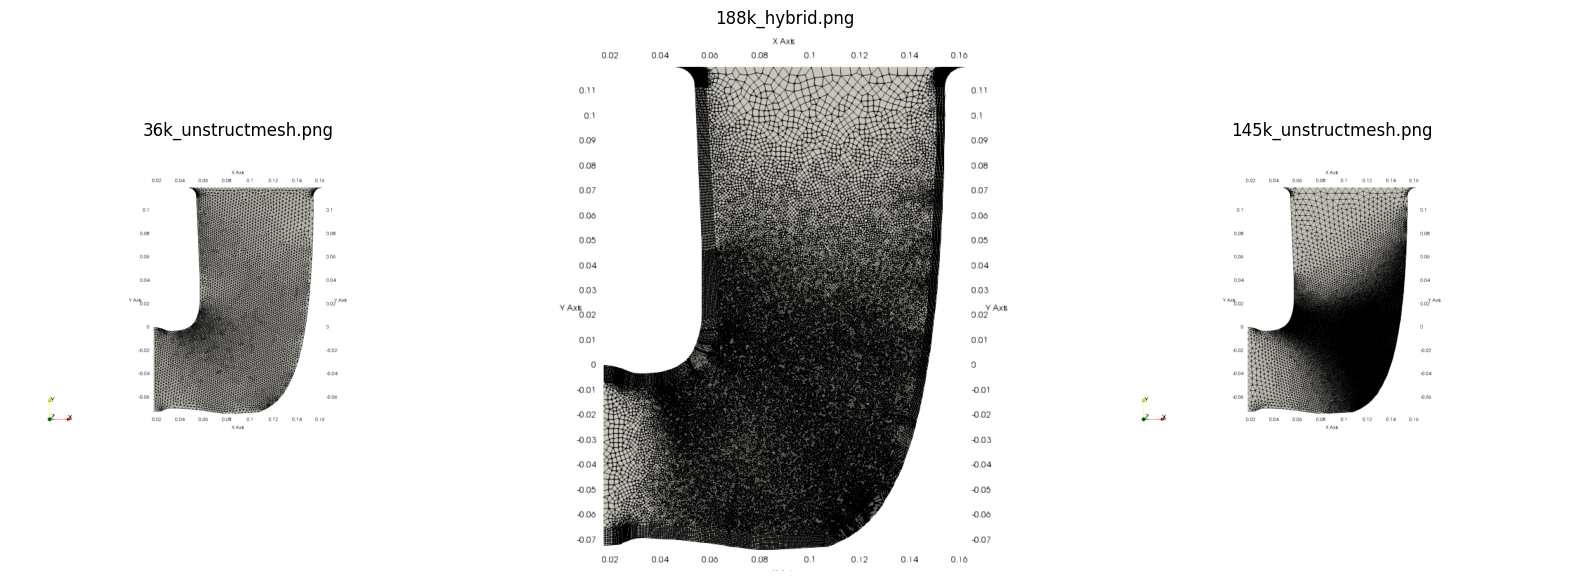

In [16]:

# Create a figure to display the meshes

# Define the specific image indices you want to display
image_indices = [8, 9, 10]  

fig, axes = plt.subplots(1, 3, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()


##### SimpleFOAM and PimpleFOAM comparison - made on 36k unstructured mesh

Text(0.5, 1.0, 'Outlet (x,y) = [(0, 0.11) (0.15, 0.11)]')

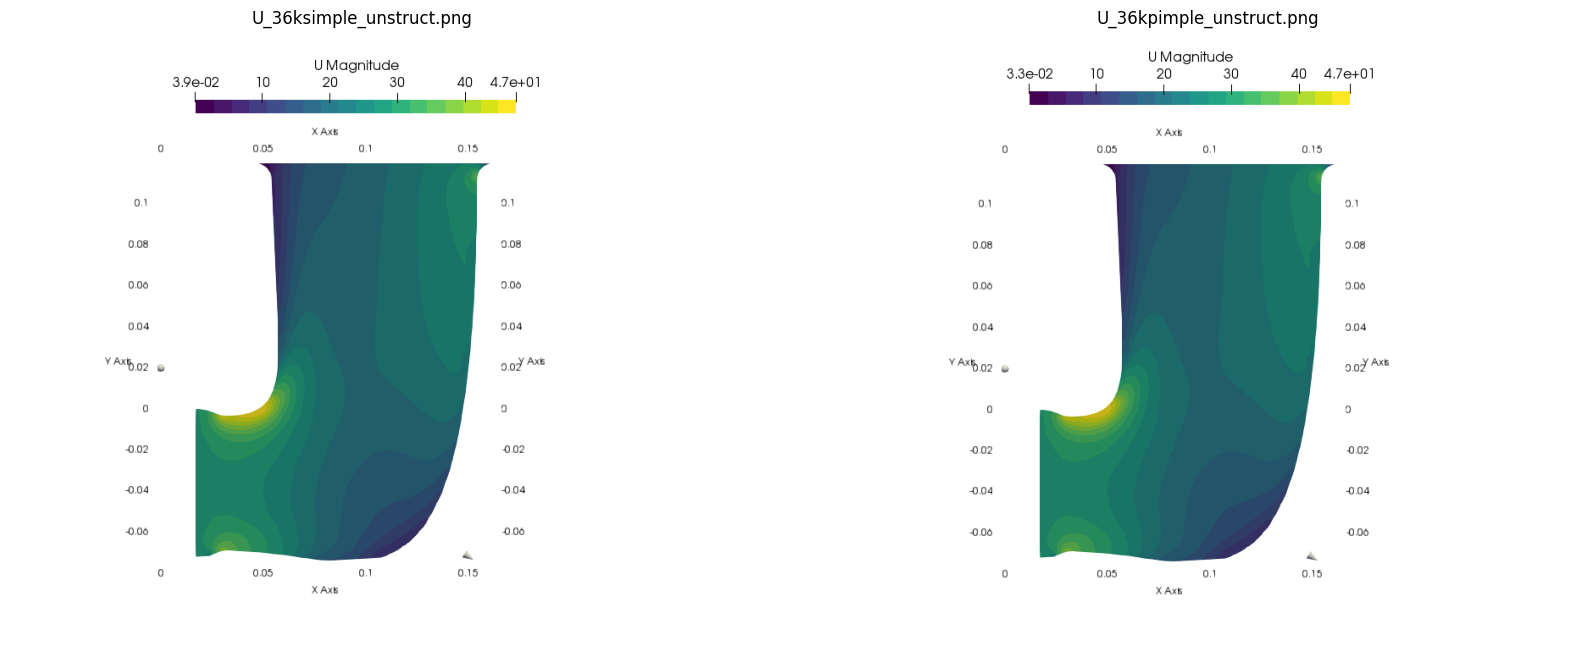

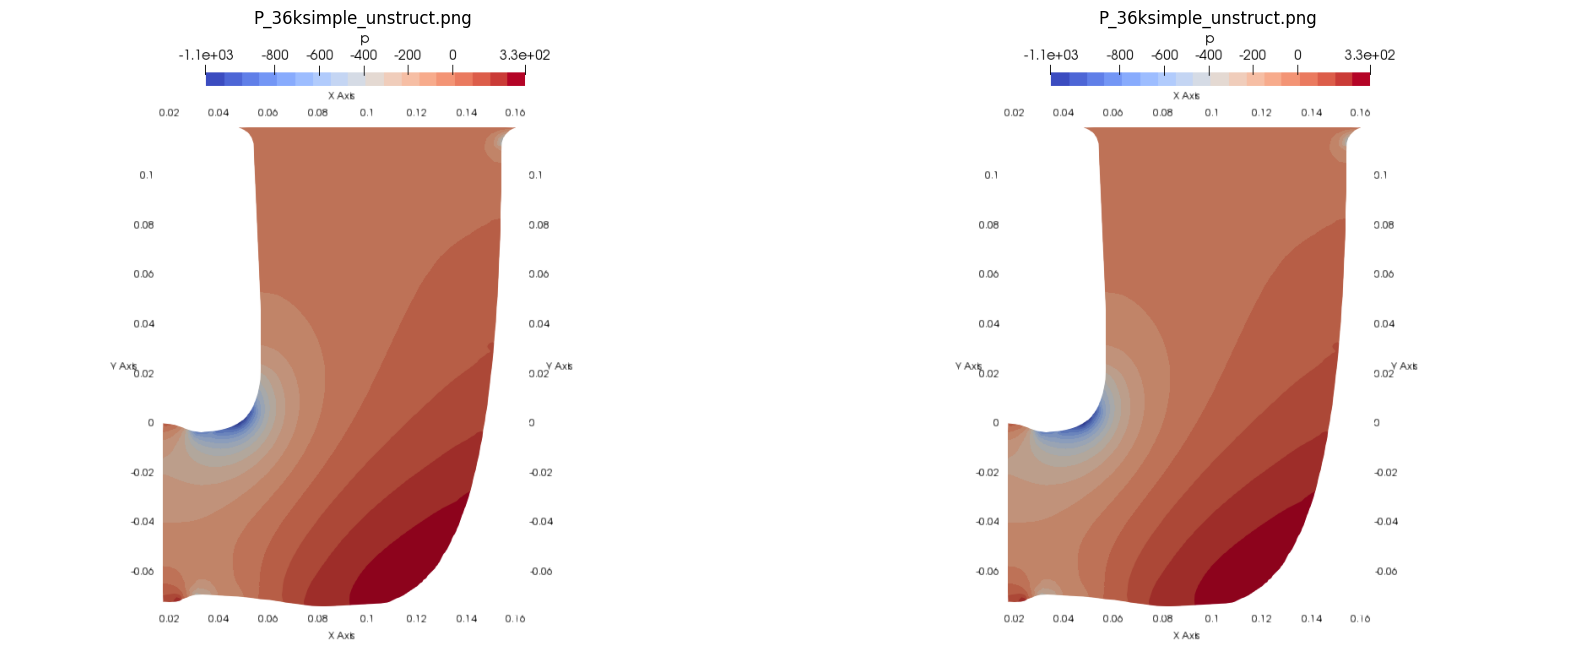

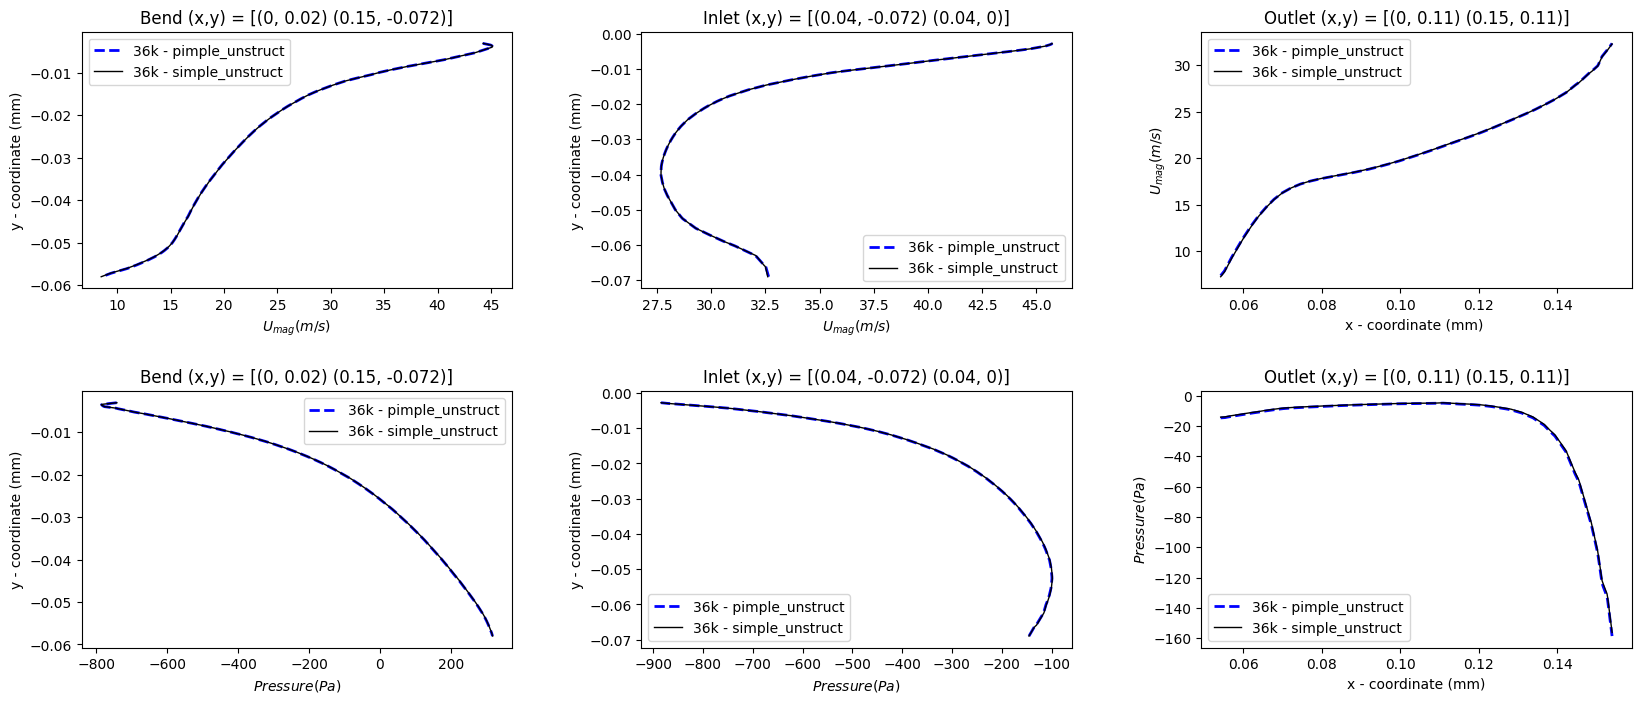

In [17]:

# # Create a figure to display the contours
fig, axes = plt.subplots(1, 2, figsize=(20, 20))  # Adjust the figsize as needed

i = 0

for ax in axes:
    ax.imshow(images[i])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[i])  # Set the title to the filename
    i+=1

# Create a figure to display the contours
fig, axes = plt.subplots(1, 2, figsize=(20, 20))  # Adjust the figsize as needed

i = 4

for ax in axes:
    ax.imshow(images[i])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[i])  # Set the title to the filename


# Plot each data set in a separate subplot


# Create a figure to display the contours
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize = (20, 8))  # Adjust the figsize as needed

# Adjust layout to prevent overlap and add space between rows
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust hspace and wspace as needed

ax1.plot(vel_mag[250:848,2], coor_y[250:848,2], "b--", linewidth = 2, label = '36k - pimple_unstruct')
ax1.plot(vel_mag[250:848,3], coor_y[250:848,3], 'k', linewidth = 1, label = '36k - simple_unstruct')
ax1.set_xlabel(r'$U_{mag} (m/s)$'); ax1.set_ylabel('y - coordinate (mm)'); ax1.set_title('Bend (x,y) = [(0, 0.02) (0.15, -0.072)]'); ax1.legend()

ax2.plot(vel_mag[24:367,6], coor_y[24:367,6], "b--", linewidth = 2, label = '36k - pimple_unstruct')
ax2.plot(vel_mag[24:367,7], coor_y[24:367,7], 'k', linewidth = 1, label = '36k - simple_unstruct')
ax2.set_xlabel(r'$U_{mag} (m/s)$'); ax2.set_ylabel('y - coordinate (mm)'); ax2.legend(); ax2.set_title('Inlet (x,y) = [(0.04, -0.072) (0.04, 0)]')

ax3.plot(coor_x[338:962,10], vel_mag[338:962,10], "b--", linewidth = 2, label = '36k - pimple_unstruct')
ax3.plot(coor_x[338:962,11], vel_mag[338:962,11], 'k', linewidth = 1, label = '36k - simple_unstruct')
ax3.set_xlabel('x - coordinate (mm) '); ax3.set_ylabel('$U_{mag} (m/s)$'); ax3. legend(); ax3.set_title('Outlet (x,y) = [(0, 0.11) (0.15, 0.11)]')

ax4.plot(pressure[250:848,2], coor_y[250:848,2], "b--", linewidth = 2, label = '36k - pimple_unstruct')
ax4.plot(pressure[250:848:,3], coor_y[250:848,3], 'k', linewidth = 1, label = '36k - simple_unstruct')
ax4.set_xlabel(r'$Pressure (Pa)$'); ax4.set_ylabel('y - coordinate (mm)'); ax4.set_title('Bend (x,y) = [(0, 0.02) (0.15, -0.072)]'); ax4.legend()

ax5.plot(pressure[24:367,6], coor_y[24:367,6], "b--", linewidth = 2, label = '36k - pimple_unstruct')
ax5.plot(pressure[24:367,7], coor_y[24:367,7], 'k', linewidth = 1, label = '36k - simple_unstruct')
ax5.set_xlabel(r'$Pressure (Pa)$'); ax5.set_ylabel('y - coordinate (mm)'); ax5.set_title('Inlet (x,y) = [(0.04, -0.072) (0.04, 0)]'); ax5.legend();

ax6.plot(coor_x[338:962,10], pressure[338:962,10], "b--", linewidth = 2, label = '36k - pimple_unstruct')
ax6.plot(coor_x[338:962,11], pressure[338:962,11], 'k', linewidth = 1, label = '36k - simple_unstruct')
ax6.set_xlabel('x - coordinate (mm)'); ax6.set_ylabel(r'$Pressure (Pa)$'); ax6. legend(); ax6.set_title('Outlet (x,y) = [(0, 0.11) (0.15, 0.11)]')



##### All results together

Text(0.5, 1.0, 'Outlet (x,y) = [(0, 0.11) (0.15, 0.11)]')

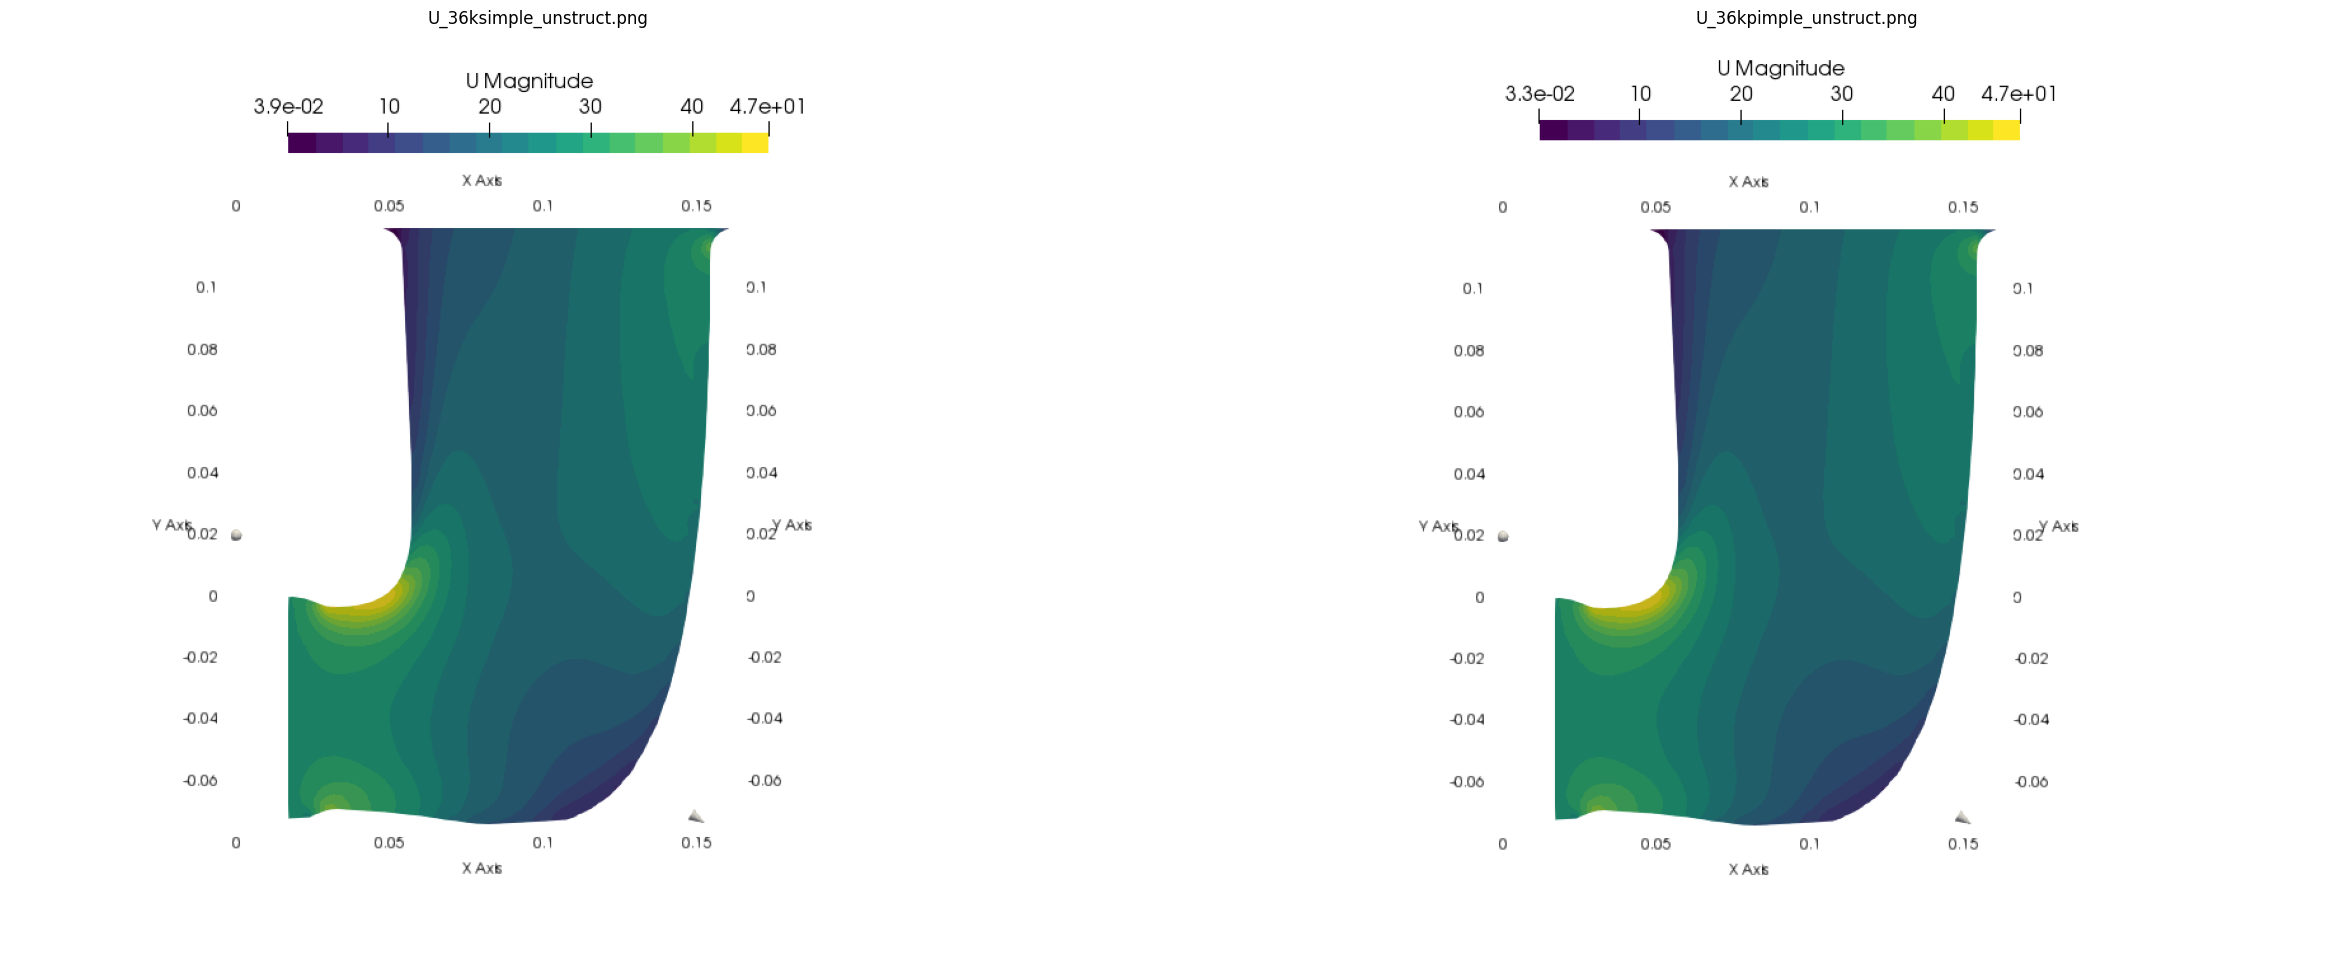

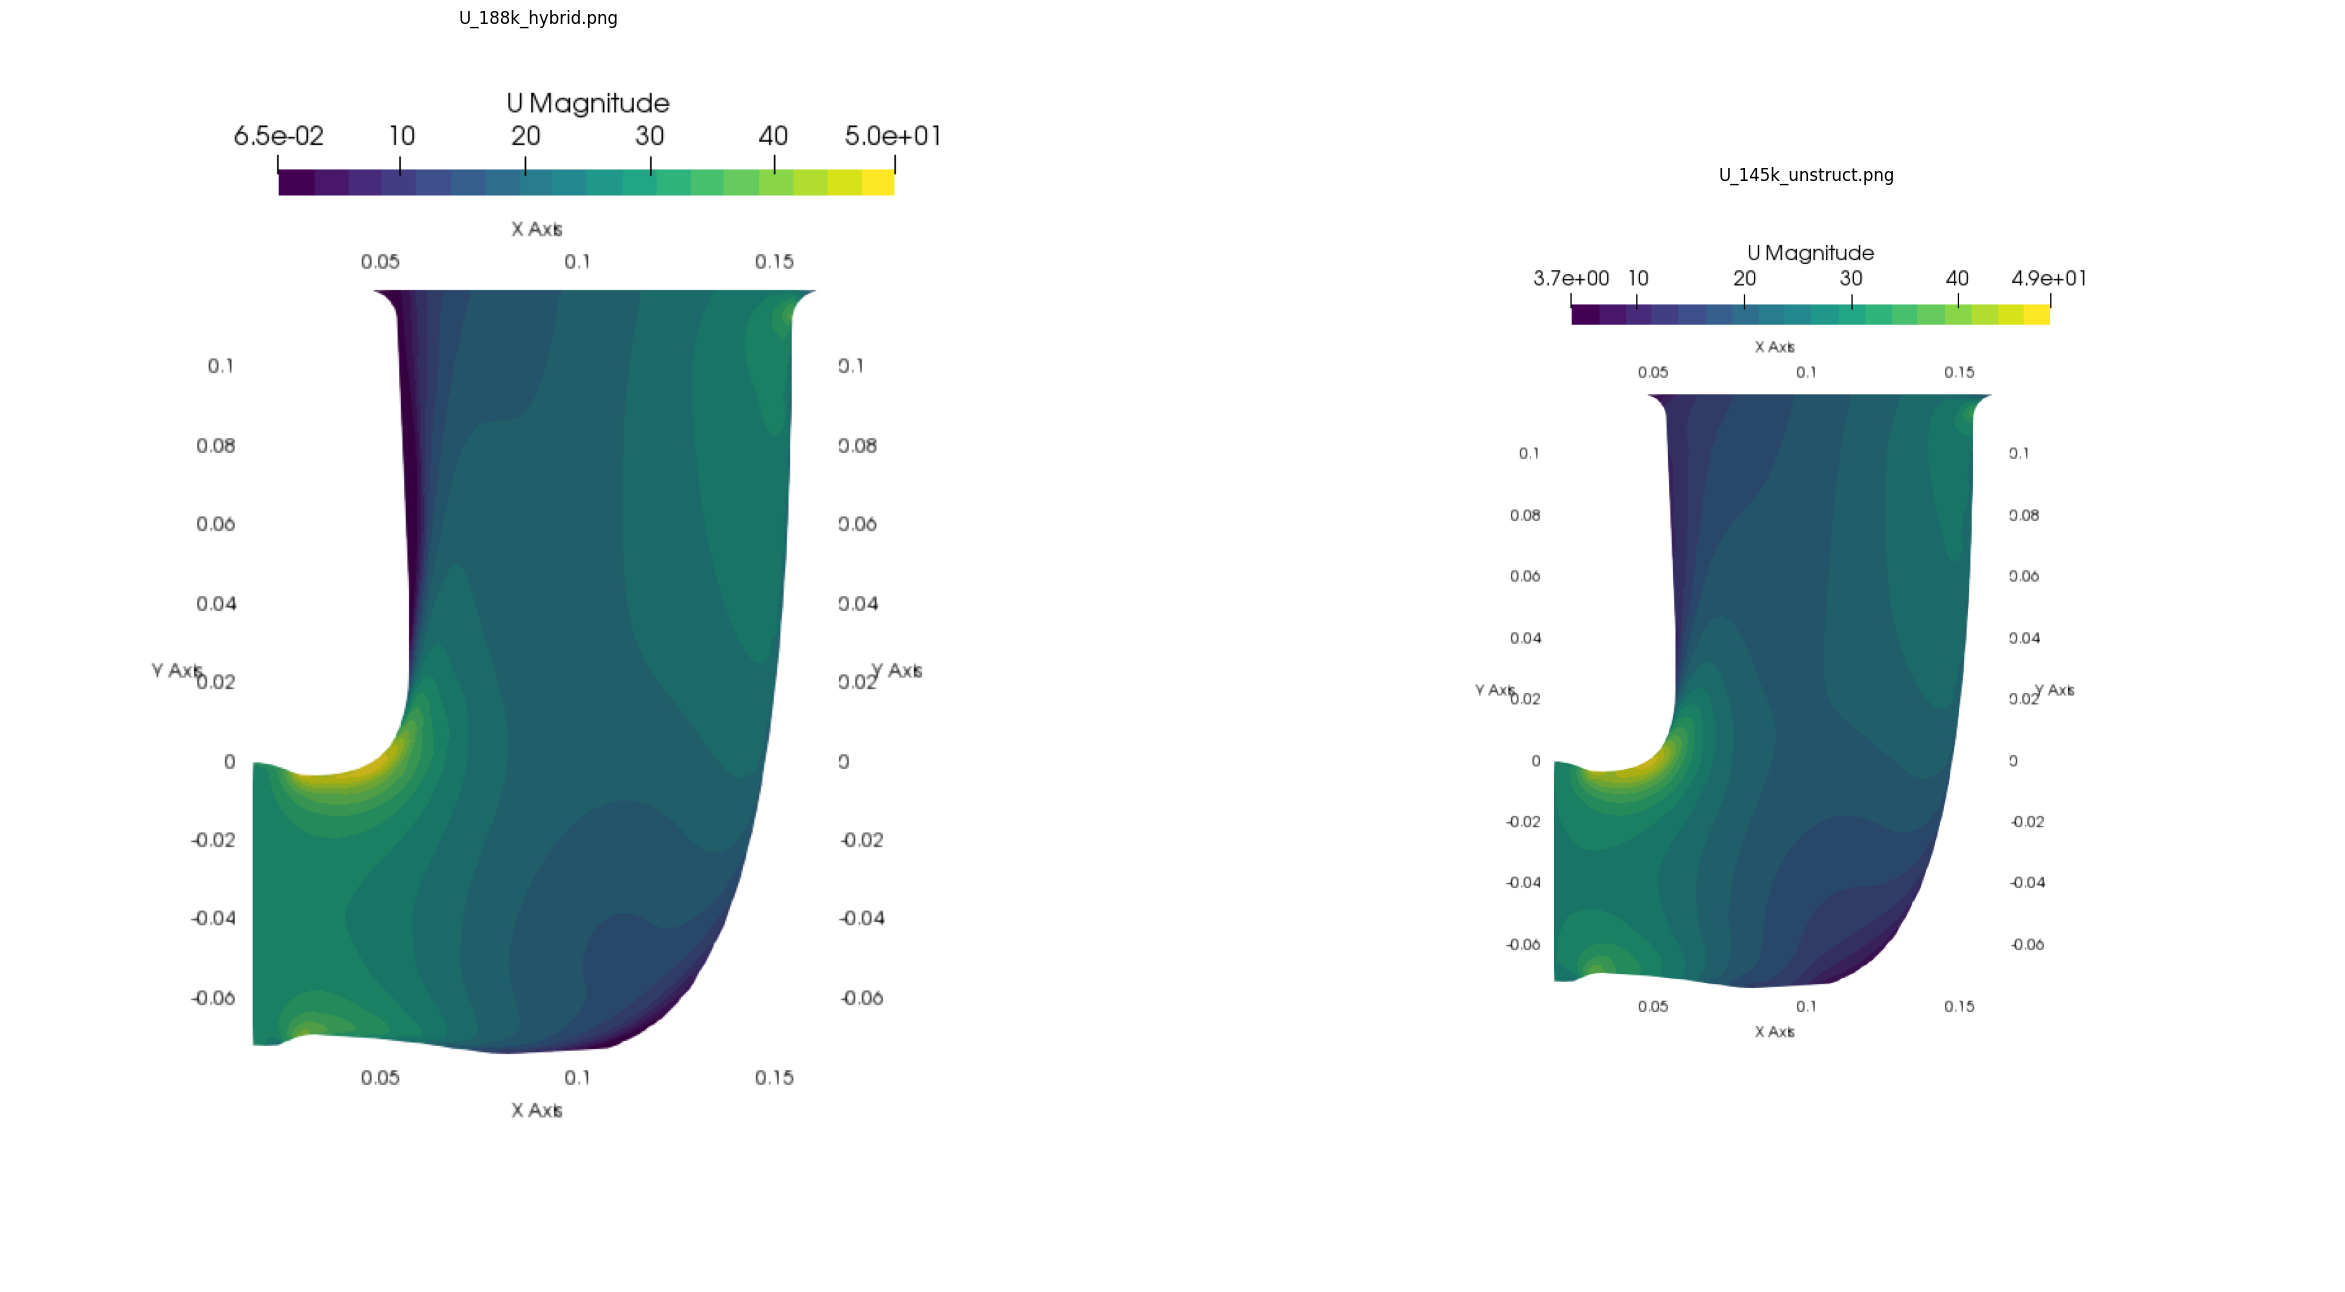

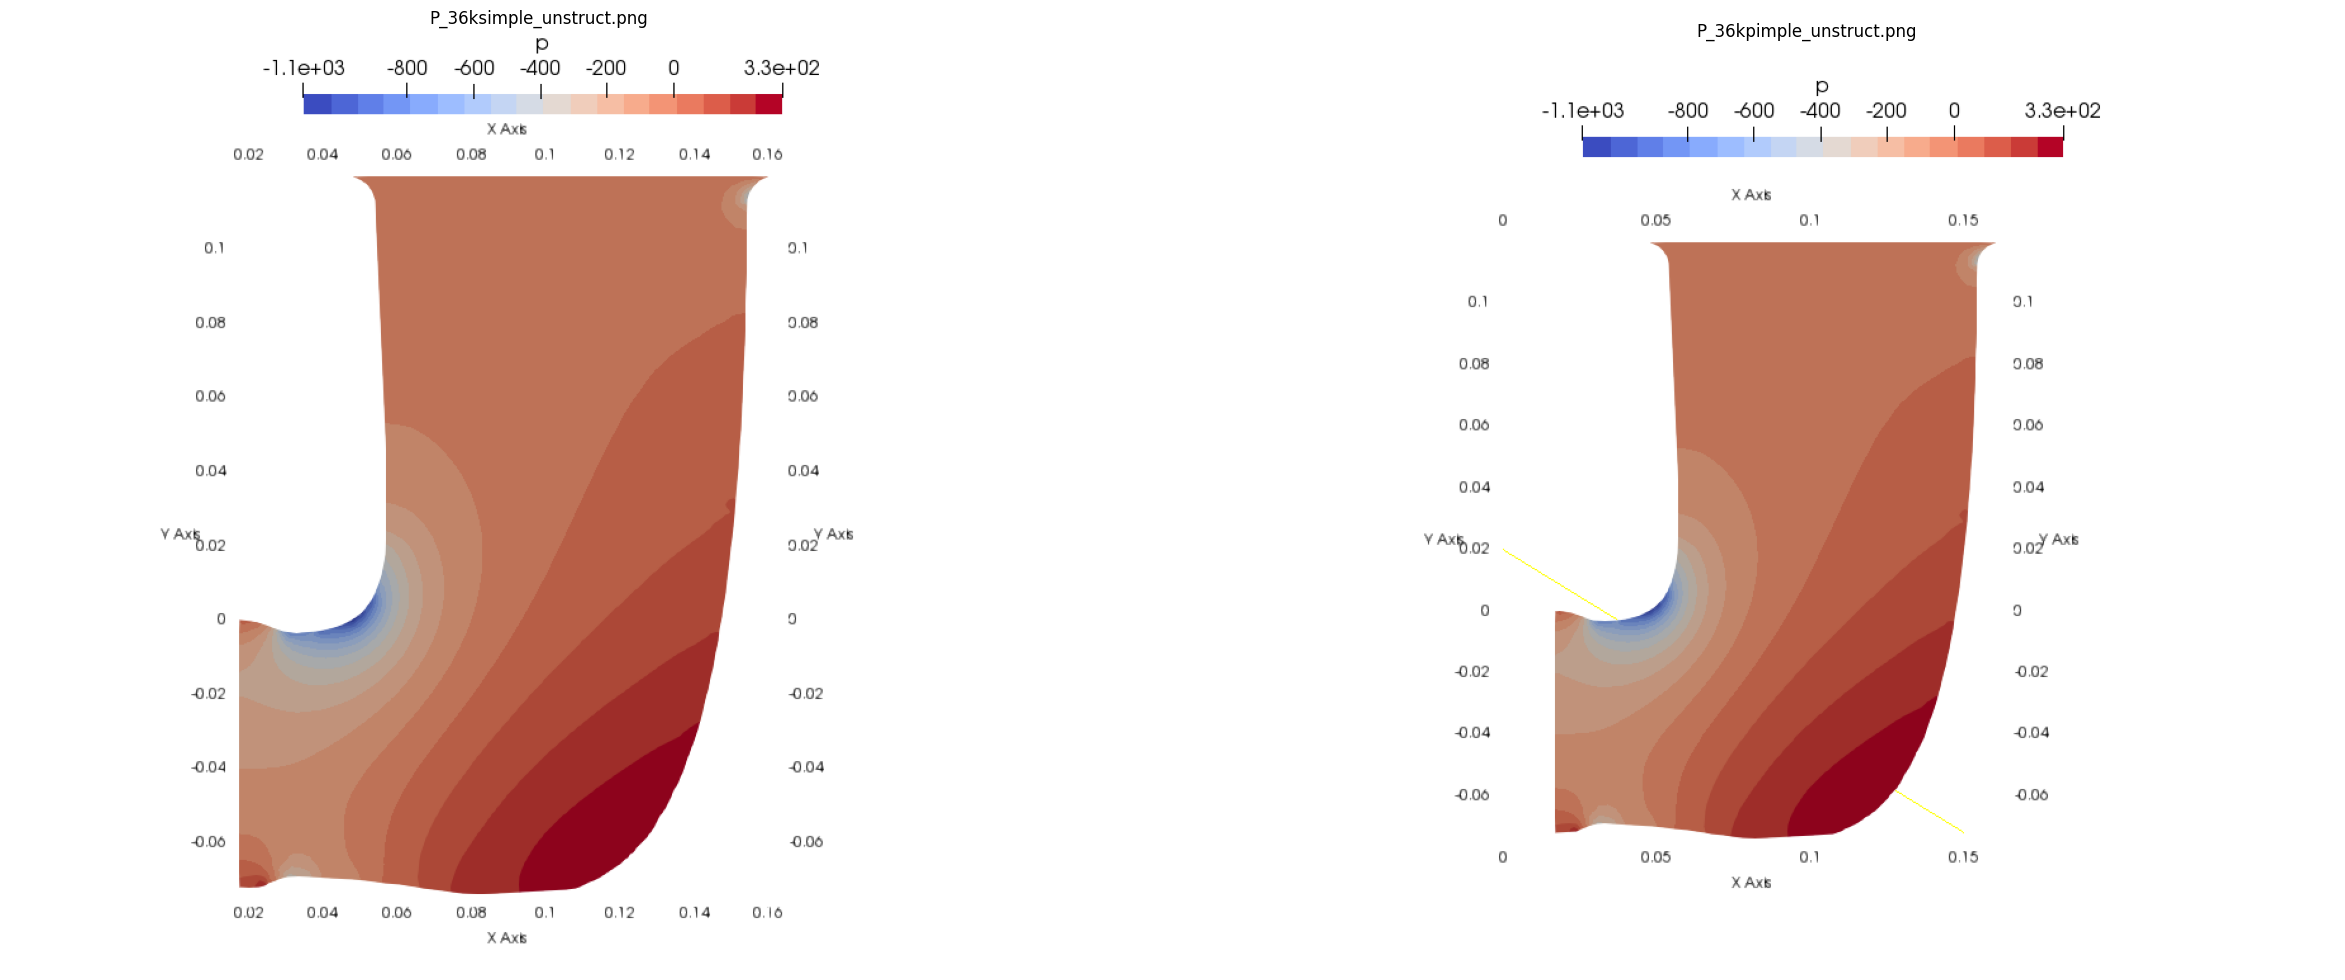

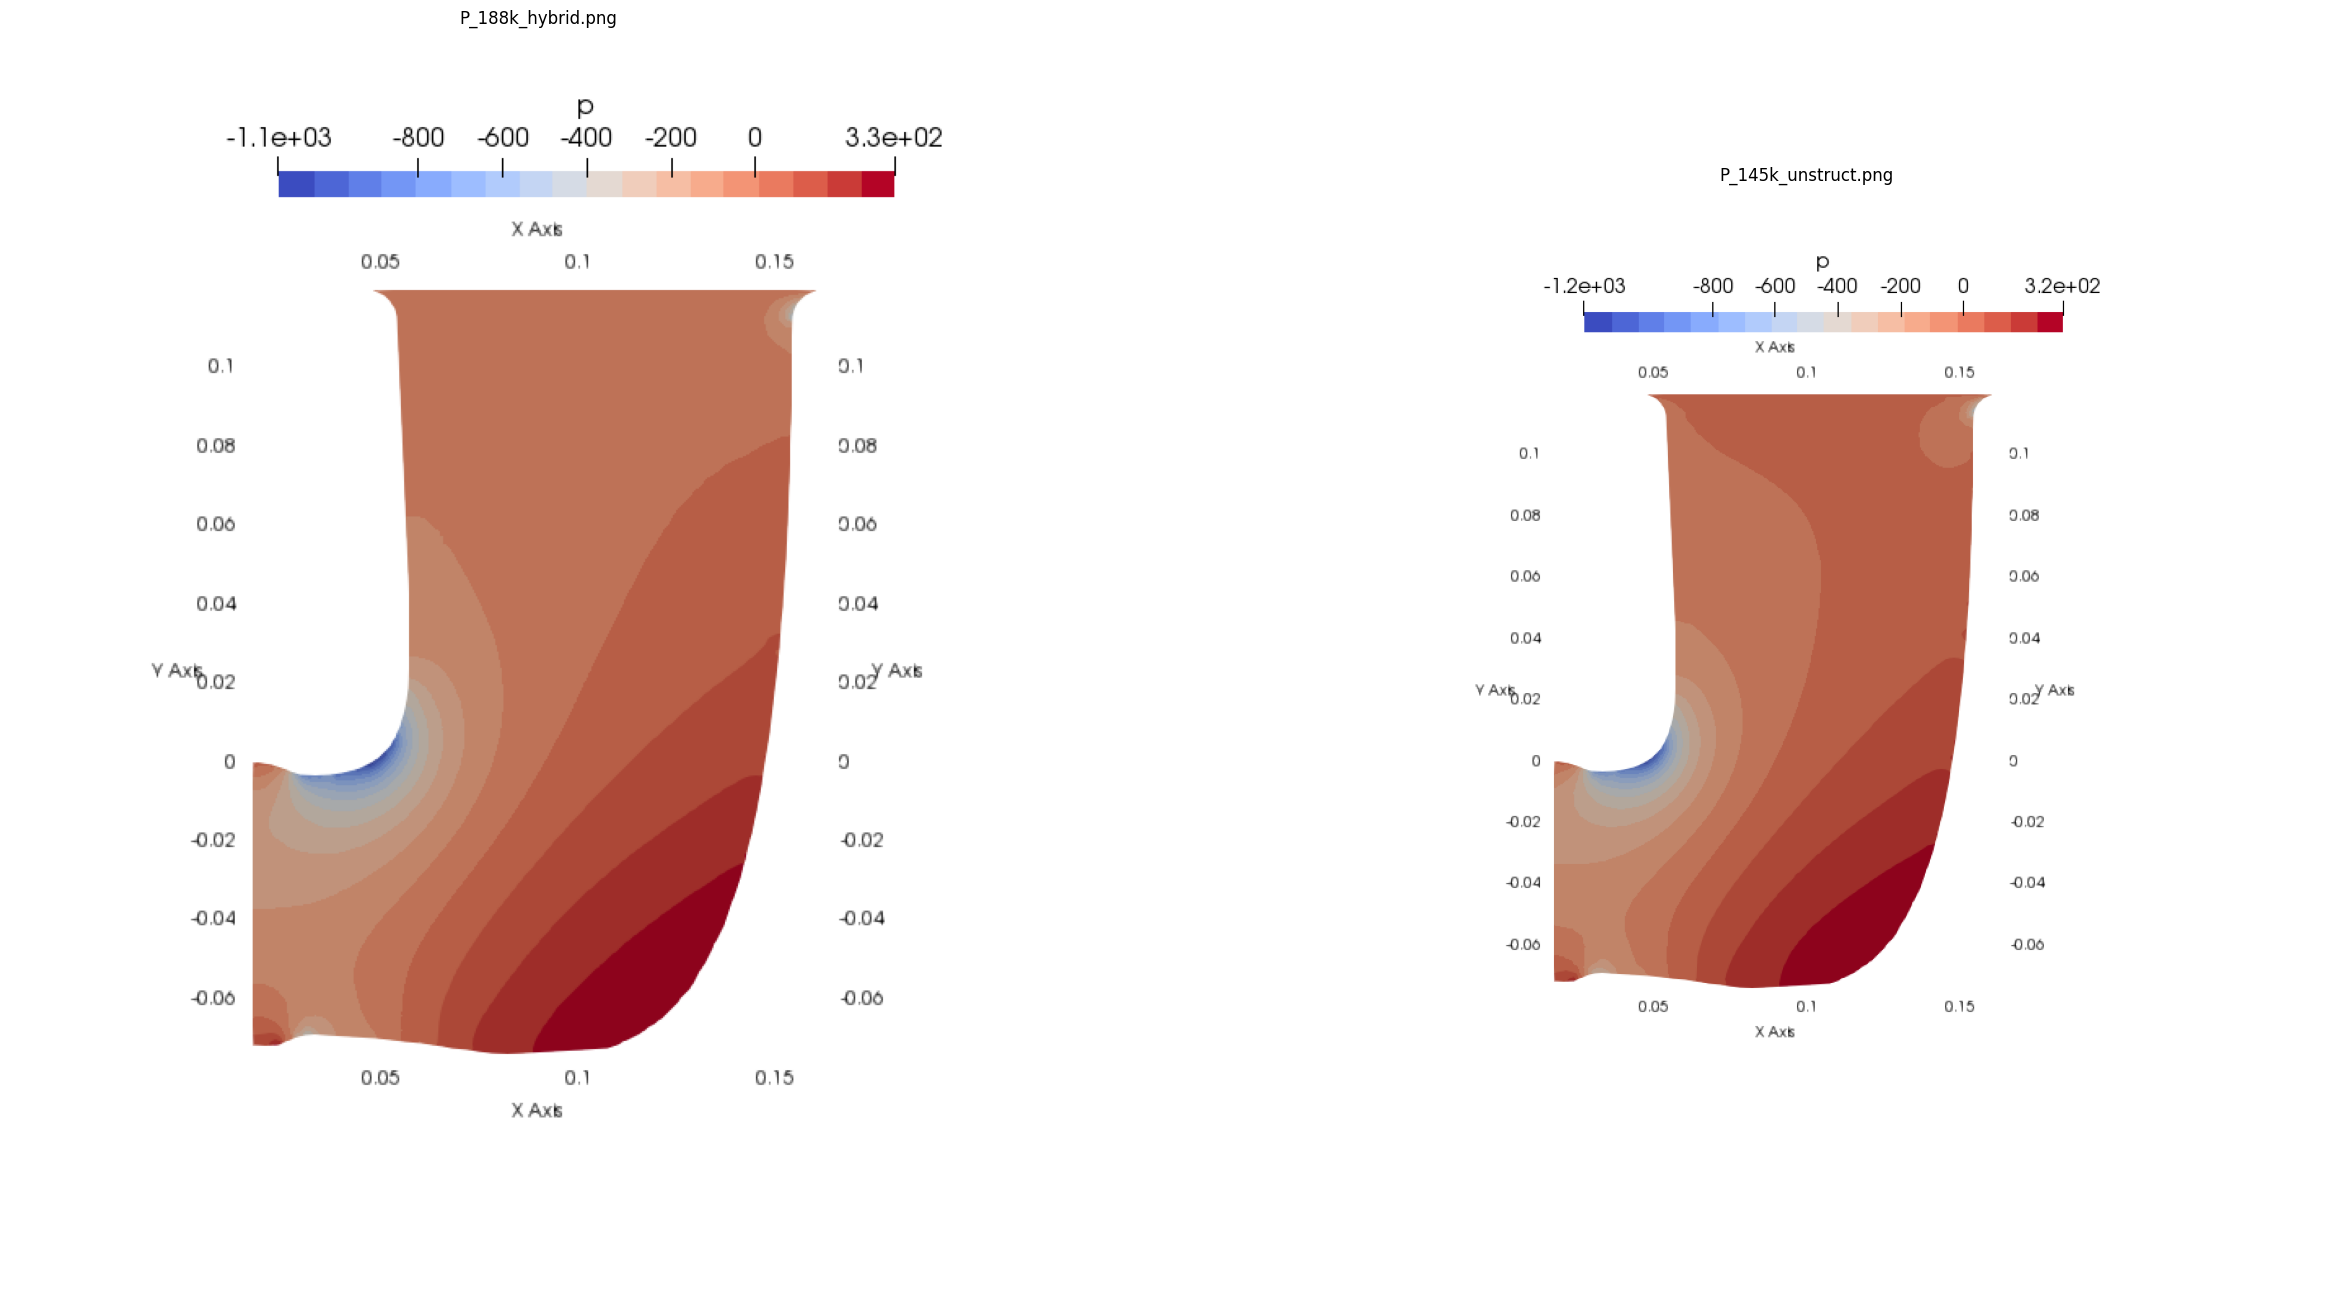

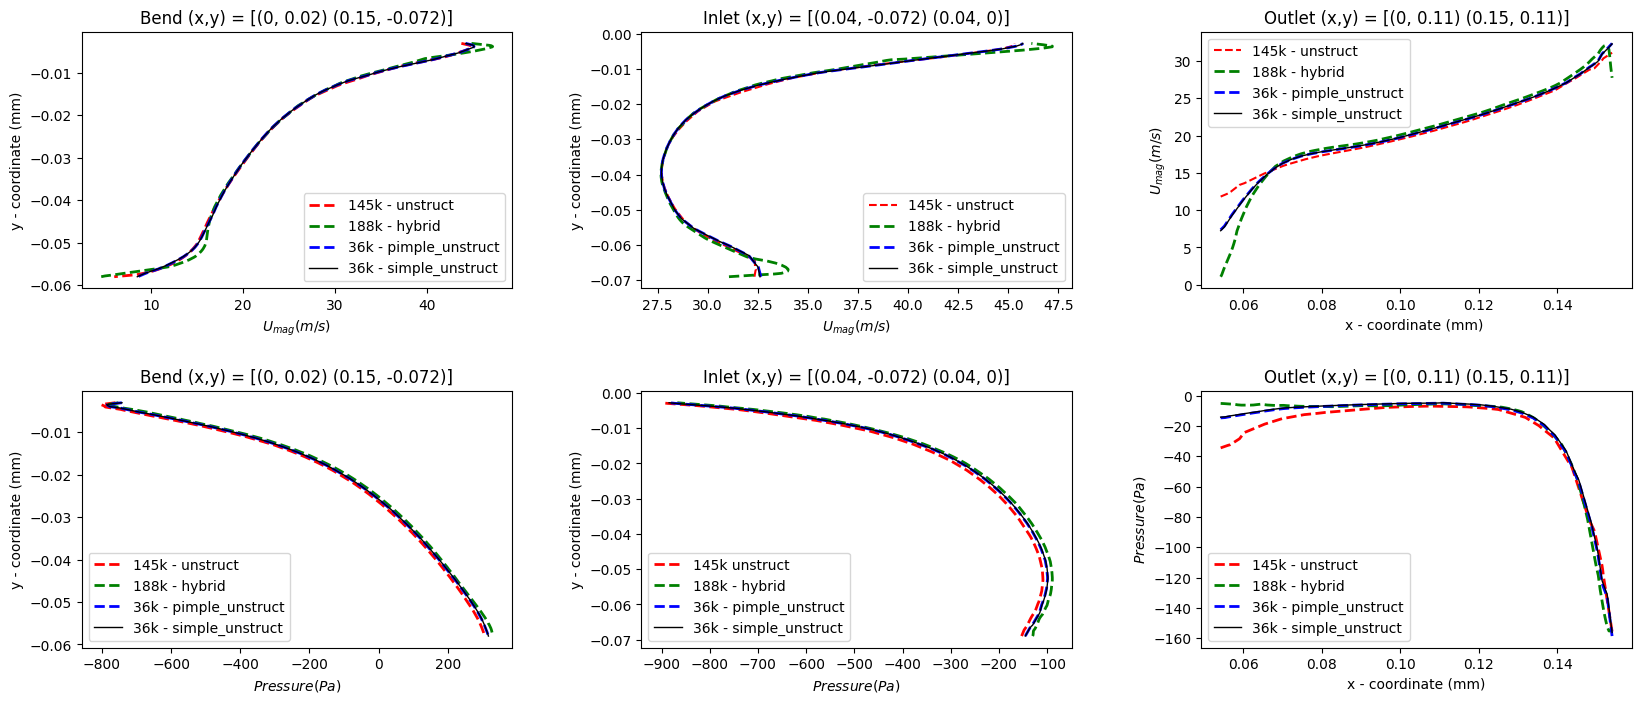

In [26]:
# Create a figure to display the contours
fig, axes = plt.subplots(1, 2, figsize=(30, 20))  # Adjust the figsize as needed

i = 0

for ax in axes:
    ax.imshow(images[i])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[i])  # Set the title to the filename
    i+=1

fig, axes = plt.subplots(1, 2, figsize=(30, 20))  # Adjust the figsize as needed

i = 2

for ax in axes:
    ax.imshow(images[i])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[i])  # Set the title to the filename
    i+=1

# Create a figure to display the contours
fig, axes = plt.subplots(1, 2, figsize=(30, 20))  # Adjust the figsize as needed

i = 4

for ax in axes:
    ax.imshow(images[i])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[i])  # Set the title to the filename
    i+=1

fig, axes = plt.subplots(1, 2, figsize=(30, 20))  # Adjust the figsize as needed

i = 6

for ax in axes:
    ax.imshow(images[i])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[i])  # Set the title to the filename
    i+=1


# Plot each data set in a separate subplot


# Create a figure to display the contours
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize = (20, 8))  # Adjust the figsize as needed

# Adjust layout to prevent overlap and add space between rows
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust hspace and wspace as needed

ax1.plot(vel_mag[250:848,0], coor_y[250:848,0], "r--", linewidth = 2, label = '145k - unstruct')
ax1.plot(vel_mag[250:848,1], coor_y[250:848,1], "g--", linewidth = 2, label = '188k - hybrid')
ax1.plot(vel_mag[250:848,2], coor_y[250:848,2], "b--", linewidth = 2, label = '36k - pimple_unstruct')
ax1.plot(vel_mag[250:848:,3], coor_y[250:848,3], 'k', linewidth = 1, label = '36k - simple_unstruct')
ax1.set_xlabel(r'$U_{mag} (m/s)$'); ax1.set_ylabel('y - coordinate (mm)'); ax1.set_title('Bend (x,y) = [(0, 0.02) (0.15, -0.072)]'); ax1.legend()

ax2.plot(vel_mag[24:367,4], coor_y[24:367,4], "r--", linewidth = 1.5, label = '145k - unstruct')
ax2.plot(vel_mag[24:367,5], coor_y[24:367,5], "g--", linewidth = 2, label = '188k - hybrid')
ax2.plot(vel_mag[24:367,6], coor_y[24:367,6], "b--", linewidth = 2, label = '36k - pimple_unstruct')
ax2.plot(vel_mag[24:367,7], coor_y[24:367,7], 'k', linewidth = 1, label = '36k - simple_unstruct')
ax2.set_xlabel(r'$U_{mag} (m/s)$'); ax2.set_ylabel('y - coordinate (mm)'); ax2.legend(); ax2.set_title('Inlet (x,y) = [(0.04, -0.072) (0.04, 0)]')

ax3.plot(coor_x[338:962,8], vel_mag[338:962,8], 'r--', linewidth = 1.5, label = '145k - unstruct')
ax3.plot(coor_x[338:962,9], vel_mag[338:962,9], "g--", linewidth = 2, label = '188k - hybrid')
ax3.plot(coor_x[338:962,10], vel_mag[338:962,10], "b--", linewidth = 2, label = '36k - pimple_unstruct')
ax3.plot(coor_x[338:962,11], vel_mag[338:962,11], 'k', linewidth = 1, label = '36k - simple_unstruct')
ax3.set_xlabel('x - coordinate (mm) '); ax3.set_ylabel('$U_{mag} (m/s)$'); ax3. legend(); ax3.set_title('Outlet (x,y) = [(0, 0.11) (0.15, 0.11)]')

ax4.plot(pressure[250:848,0], coor_y[250:848,0], "r--", linewidth = 2, label = '145k - unstruct')
ax4.plot(pressure[250:848,1], coor_y[250:848,1], "g--", linewidth = 2, label = '188k - hybrid')
ax4.plot(pressure[250:848,2], coor_y[250:848,2], "b--", linewidth = 2, label = '36k - pimple_unstruct')
ax4.plot(pressure[250:848:,3], coor_y[250:848,3], 'k', linewidth = 1, label = '36k - simple_unstruct')
ax4.set_xlabel(r'$Pressure (Pa)$'); ax4.set_ylabel('y - coordinate (mm)'); ax4.set_title('Bend (x,y) = [(0, 0.02) (0.15, -0.072)]'); ax4.legend()

ax5.plot(pressure[24:367,4], coor_y[24:367,4], "r--", linewidth = 2, label = '145k unstruct')
ax5.plot(pressure[24:367,5], coor_y[24:367,5], "g--", linewidth = 2, label = '188k - hybrid')
ax5.plot(pressure[24:367,6], coor_y[24:367,6], "b--", linewidth = 2, label = '36k - pimple_unstruct')
ax5.plot(pressure[24:367,7], coor_y[24:367,7], 'k', linewidth = 1, label = '36k - simple_unstruct')
ax5.set_xlabel(r'$Pressure (Pa)$'); ax5.set_ylabel('y - coordinate (mm)'); ax5.set_title('Inlet (x,y) = [(0.04, -0.072) (0.04, 0)]'); ax5.legend();

ax6.plot(coor_x[338:962,8], pressure[338:962,8], "r--", linewidth = 2, label = '145k - unstruct')
ax6.plot(coor_x[338:962,9], pressure[338:962,9], "g--", linewidth = 2, label = '188k - hybrid')
ax6.plot(coor_x[338:962,10], pressure[338:962,10], "b--", linewidth = 2, label = '36k - pimple_unstruct')
ax6.plot(coor_x[338:962,11], pressure[338:962,11], 'k', linewidth = 1, label = '36k - simple_unstruct')
ax6.set_xlabel('x - coordinate (mm)'); ax6.set_ylabel(r'$Pressure (Pa)$'); ax6. legend(); ax6.set_title('Outlet (x,y) = [(0, 0.11) (0.15, 0.11)]')

#### Testing pressure points

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import os


# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Turbine_exit_bend/Left_bend/Data_files/pressure_points/sample'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)

num_rows = 1000;
num_cols = len(csv_files)
num_cases = 6

# Read each CSV file into a DataFrame
# vel_mag = np.zeros((num_rows, num_cols), dtype = np.float64)
coor_y = np.zeros((num_rows, num_cols), dtype = np.float64)
coor_x = np.zeros((num_rows, num_cols), dtype = np.float64)
pressure = np.zeros((num_rows, num_cols), dtype = np.float64)

for idx, file in enumerate(csv_files):
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, skiprows = [0])
    pressure[:,idx] = df.iloc[:,0]
    coor_x[:,idx] = df.iloc[:,3]
    coor_y[:,idx] = df.iloc[:,4]

# plt.figure()
# plt.plot(coor_y[:,0],pressure[:,0])
# plt.show()

# # plt.figure()
# # plt.plot(pressure[:,1], coor_y[:,1])
# # plt.show()

# # plt.figure()
# # plt.plot(pressure[:,2], coor_y[:,2])
# # plt.show()


x_inlet = coor_y[:,0]
dx_inlet = x_inlet[1]-x_inlet[0]
P_dinlet = pressure[:,2]
P_sinlet = pressure[:,4]
mfx_inlet = pressure[:,0]

mfx_outlet = pressure[:,1]
x_outlet = coor_x[:,1]
dx_outlet = x_outlet[1]-x_outlet[0]
P_doutlet = pressure[:,3]
P_soutlet = pressure[:,5]


print( dx_inlet , (x_inlet[-1]-x_inlet[0]) )
import scipy 
# statP_inlet = scipy.integrate.trapezoid(P_s, x)
statP_inlet = np.sum(P_sinlet*dx_inlet)/ (x_inlet[-1]-x_inlet[0])
dynP_inlet = np.sum(P_dinlet*mfx_inlet*dx_inlet) / np.sum(mfx_inlet*dx_inlet)
print( statP_inlet, dynP_inlet )
total_press_inlet = statP_inlet + dynP_inlet
print( total_press_inlet )



print( dx_outlet , (x_outlet[-1]-x_outlet[0]) )
# statP_inlet = scipy.integrate.trapezoid(P_s, x)
statP_outlet = np.sum(P_soutlet*dx_outlet)/ (x_outlet[-1]-x_outlet[0])
dynP_outlet = np.sum(P_doutlet*mfx_outlet*dx_outlet) / np.sum(mfx_outlet*dx_outlet)
print( statP_outlet, dynP_outlet)
total_press_outlet = statP_outlet + dynP_outlet
print( total_press_outlet )

['mass_flux_inlet.csv', 'mass_flux_outlet.csv', 'pressure_dyn_inlet.csv', 'pressure_dyn_outlet.csv', 'pressure_stat_inlet.csv', 'pressure_stat_outlet.csv']
7.210000000000549e-05 0.0720279
-143.8142602592702 495.522791928789
351.7085316695188
0.00011600000000000499 0.11588400000000001
0.0011554267990577637 286.82682087661107
286.82797630341014


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import os


# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Turbine_exit_bend/Left_bend/Data_files/pressure_points'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)

num_rows = 1000;
num_cols = len(csv_files)
num_cases = 21

# Read each CSV file into a DataFrame
# vel_mag = np.zeros((num_rows, num_cols), dtype = np.float64)
coor_y = np.zeros((num_rows, num_cols), dtype = np.float64)
coor_x = np.zeros((num_rows, num_cols), dtype = np.float64)
pressure_stat = np.zeros((num_rows, num_cols), dtype = np.float64)
pressure_dyn = np.zeros((num_rows, num_cols), dtype = np.float64)
mass_flux = np.zeros((num_rows, num_cols), dtype = np.float64)


for idx, file in enumerate(csv_files):
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, skiprows = [0])
    pressure_dyn[:,idx] = df.iloc[:,0]
    mass_flux[:,idx] = df.iloc[:,1]
    pressure_stat[:,idx] = df.iloc[:,2]
    coor_x[:,idx] = df.iloc[:,3]
    coor_y[:,idx] = df.iloc[:,4]

# x_inlet = coor_y[:,0]
dy_inlet = coor_y[1,0] - coor_y[0,0]
dx_outlet = coor_x[1,11] - coor_x[0,11]

p_stat_inlet = []
p_stat_outlet = []
p_dyn_inlet = []
p_dyn_outlet = []
p_total_inlet = []
p_total_outlet = []

# print(np.sum(pressure_stat[:,17]*dx_outlet))
# print(coor_y[-1,7] - coor_y[0,7])


for i in range(22):
    if i < 11:
        p_stat_inlet.append(float(+1*(np.sum(pressure_stat[:,i]*dy_inlet) / (coor_y[-1,i] - coor_y[0,i]))))
        p_dyn_inlet.append(float(1*(np.sum(pressure_dyn[:,i]*dy_inlet*mass_flux[:,i]) / np.sum(mass_flux[:,i]*dy_inlet))))
        p_total_inlet.append(p_stat_inlet[-1] + p_dyn_inlet[-1])
    else:
        p_stat_outlet.append(float(np.sum(pressure_stat[:,i]*dx_outlet) / (coor_x[-1,i] - coor_x[0,i])))
        p_dyn_outlet.append(float(np.sum(pressure_dyn[:,i]*dx_outlet*mass_flux[:,i]) / np.sum(mass_flux[:,i]*dx_outlet)))
        p_total_outlet.append(p_stat_outlet[-1] + p_dyn_outlet[-1])

stat_pressure_drop = np.array(p_stat_inlet) - np.array(p_stat_outlet)
dynamic_pressure_drop = np.array(p_dyn_inlet) - np.array(p_dyn_outlet)
total_pressure_drop = np.array(p_total_inlet) - np.array(p_total_outlet)

['inlet_120k_1storder.csv', 'inlet_120k_2ndorder.csv', 'inlet_145k.csv', 'inlet_212k.csv', 'inlet_28k.csv', 'inlet_56k.csv', 'inlet_79k.csv', 'inlet_hybrid.csv', 'inlet_hybrid_100k.csv', 'inlet_pimple.csv', 'inlet_simple.csv', 'outlet_120k_1storder.csv', 'outlet_120k_2ndorder.csv', 'outlet_145k.csv', 'outlet_212k.csv', 'outlet_28k.csv', 'outlet_56k.csv', 'outlet_79k.csv', 'outlet_hybrid.csv', 'outlet_hybrid_100k.csv', 'outlet_pimple.csv', 'outlet_simple.csv']


['mesh_120k_unstruct.png', '79k_unstruct_mesh.png', '56k_unstruct_mesh.png', '36k_unstruct_mesh.png', '28k_unstruct_mesh.png', '212k_mesh_unstruct.png']


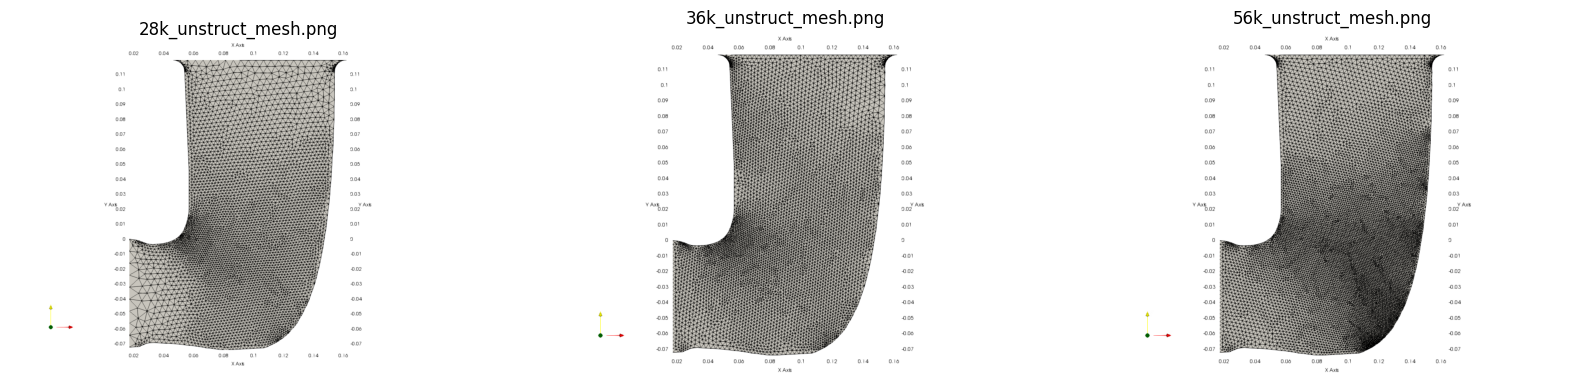

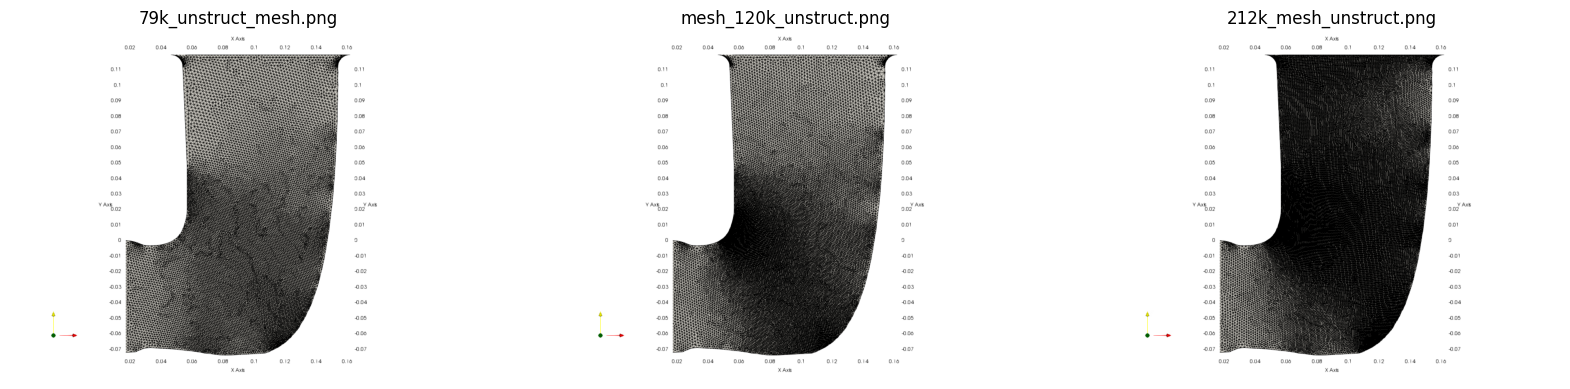

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import os


# Specify the directory where your CSV files are located
image_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Turbine_exit_bend/Left_bend/Data_files/pressure_points'

# List all files in the folder
files_image = os.listdir(image_path)

# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse = True)
print(png_files)

images = []

# Load the images and store them in the array
for png_file in png_files:
    image_path = os.path.join(folder_path, png_file)
    image = Image.open(image_path)
    images.append(np.array(image))

# Create a figure to display the meshes

# Define the specific image indices you want to display
image_indices = [4, 3, 2]  

fig, axes = plt.subplots(1, 3, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

# Define the specific image indices you want to display
image_indices = [1, 0, 5]  

fig, axes = plt.subplots(1, 3, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

In [44]:
# Create DataFrame
data = {
    "Mesh": csv_files,
    "Static Pressure ": p_stat_inlet + p_stat_outlet,
    "Dynamic Pressure ": p_dyn_inlet + p_dyn_outlet,
    "Total Pressure (Pa)": p_total_inlet + p_total_outlet
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

# Reference = 56k_unstruct_mesh_simple
percent_diff_static = np.zeros((11, 1))
percent_diff_dynamic = np.zeros((11, 1))
percent_diff_total = np.zeros((11, 1))

ref_static = np.abs(stat_pressure_drop[5]); ref_dynamic = dynamic_pressure_drop[5]; ref_tots = total_pressure_drop[5];

for i in range(11):
    percent_diff_static[i] = 100 * (np.abs(stat_pressure_drop[i]) - ref_static) / np.abs(ref_static)
    percent_diff_dynamic[i] = 100 * np.abs(dynamic_pressure_drop[i] - ref_dynamic) / ref_dynamic
    percent_diff_total[i] = 100 * np.abs(total_pressure_drop[i] - ref_tots) / ref_tots

percent_diff_static = percent_diff_static.reshape(-1); percent_diff_dynamic = percent_diff_dynamic.reshape(-1); percent_diff_total = percent_diff_total.reshape(-1)

print("\n"*2)

mesh_names = ["120k_1st order", "120k_2nd order", "145k", "212k", "28k", "56k", "79k", "hybrid", "hybrid_100k", "pimple", "simple"]

# Create DataFrame
data = {
    "Mesh": mesh_names,
    "Static Drop": stat_pressure_drop,
    "% Static Difference": percent_diff_static,
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

print("\n"*2)

mesh_names = ["120k_1st order", "120k_2nd order", "145k", "212k", "28k", "56k", "79k", "hybrid", "hybrid_100k", "pimple", "simple"]

# Create DataFrame
data = {
    "Mesh": mesh_names,
    "Dynamic Drop": dynamic_pressure_drop,
    "% Dynamic Difference": percent_diff_dynamic,
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

print("\n"*2)

mesh_names = ["120k_1st order", "120k_2nd order", "145k", "212k", "28k", "56k", "79k", "hybrid", "hybrid_100k", "pimple", "simple"]

# Create DataFrame
data = {
    "Mesh": mesh_names,
    "Total Drop": total_pressure_drop,
    "% Total Difference": percent_diff_total,
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)


                        Mesh  Static Pressure   Dynamic Pressure   \
0    inlet_120k_1storder.csv       -163.927171         495.611976   
1    inlet_120k_2ndorder.csv       -165.865390         495.688725   
2             inlet_145k.csv       -165.889319         494.969515   
3             inlet_212k.csv        -57.348780         495.703001   
4              inlet_28k.csv       -153.725859         493.627267   
5              inlet_56k.csv       -161.143034         495.592992   
6              inlet_79k.csv       -164.942123         495.669801   
7           inlet_hybrid.csv       -143.814260         495.522792   
8      inlet_hybrid_100k.csv       -130.002549         495.526319   
9           inlet_pimple.csv       -154.765014         495.529894   
10          inlet_simple.csv       -153.785433         495.505477   
11  outlet_120k_1storder.csv         -0.000864         271.276523   
12  outlet_120k_2ndorder.csv         -0.001345         272.366816   
13           outlet_145k.csv      

## Calculation of length scales

#### Calculations done with respect to the inlet

#### Steady flow -> stationary turbulent flow

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from PIL import Image
import os
# from numpy.trapz import trapz


## Inlet

l = 72 * 10**-3
U = 28.5
nu = 1.087 * 10**-5

L_integral = 70 * 10**-3

Re_o = U*l/nu

print(Re_o)


def cross_correlation_coefficient(signal1, signal2):
    len_signal1 = len(signal1)
    len_signal2 = len(signal2)

    if len_signal1 != len_signal2:
        raise ValueError("The input signals must have the same length")

    signal1_mean = sum(signal1) / len_signal1
    signal2_mean = sum(signal2) / len_signal2

    signal1_normalized = [x - signal1_mean for x in signal1]
    signal2_normalized = [x - signal2_mean for x in signal2]

    signal1_sq_sum = sum(x ** 2 for x in signal1_normalized)
    signal2_sq_sum = sum(x ** 2 for x in signal2_normalized)

    cross_corr_coeff = [0] * (2 * len_signal1 - 1)
    tau_vector = list(range(-len_signal1 + 1, len_signal1))
    
    for tau in tau_vector:
        sum_tau = 0
        for t in range(len_signal1):
            t_shifted = t + tau
            if 0 <= t_shifted < len_signal1:
                sum_tau += signal1_normalized[t] * signal2_normalized[t_shifted]
        cross_corr_coeff[tau + len_signal1 - 1] = sum_tau / (signal1_sq_sum * signal2_sq_sum) ** 0.5

    return cross_corr_coeff[len(cross_corr_coeff)//2:], tau_vector[len(cross_corr_coeff)//2:]

188776.4489420423


['scaling_vels.csv']
3


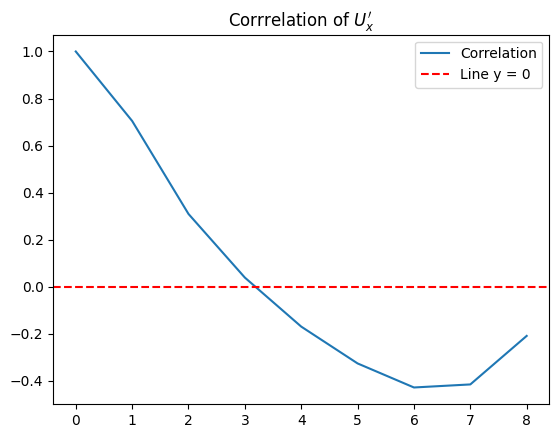

3


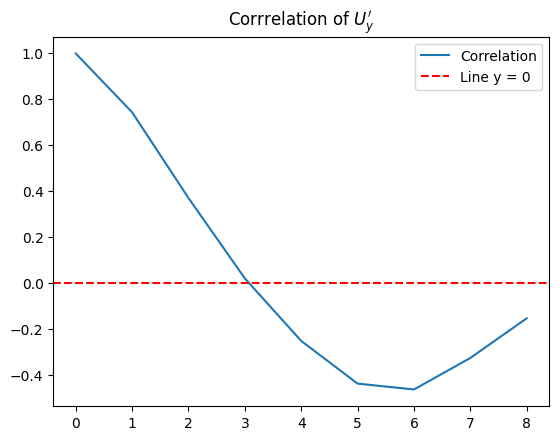

In [5]:
# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Turbine_exit_bend/Left_bend/Data_files/pressure_points/sample/scaling'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)

num_rows = 9;
num_cols = len(csv_files)
num_cases = 1

# Read each CSV file into a DataFrame
vel_x = np.zeros((num_rows, num_cols), dtype = np.float64)
vel_y = np.zeros((num_rows, num_cols), dtype = np.float64)

vel_xprime = np.zeros((num_rows, num_cols), dtype = np.float64)
vel_yprime = np.zeros((num_rows, num_cols), dtype = np.float64)

coor_x = np.zeros((num_rows, num_cols), dtype = np.float64)
coor_y = np.zeros((num_rows, num_cols), dtype = np.float64)


for idx, file in enumerate(csv_files):
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, skiprows = [0])

    vel_x[:,idx] = df.iloc[:,1]
    vel_y[:,idx] = df.iloc[:,3]

    vel_xprime[:,idx] = df.iloc[:,6]
    vel_yprime[:,idx] = df.iloc[:,7]

    coor_x[:,idx] = df.iloc[:,0]
    coor_y[:,idx] = df.iloc[:,2]

mean_Ux = df.iloc[0,4]
mean_Uy = df.iloc[0,5]


cross_corr_coeff_x, tau_vector_x = cross_correlation_coefficient(vel_x, vel_x)

for i in range(len(cross_corr_coeff_x)): 
    if np.abs(cross_corr_coeff_x[i] - 0) < 10**-1: print(tau_vector_x[i]) 

plt.figure()
plt.plot(tau_vector_x, cross_corr_coeff_x, label = 'Correlation')
plt.axhline(y = 0, color = 'r', linestyle = '--', label = 'Line y = 0')
plt.title(r"Corrrelation of $U_{x}'$")
plt.legend()
plt.show()

cross_corr_coeff_y, tau_vector_y = cross_correlation_coefficient(vel_y, vel_y)

for i in range(len(cross_corr_coeff_y)): 
    if np.abs(cross_corr_coeff_y[i] - 0) < 10**-1: print(tau_vector_y[i]) 

plt.figure()
plt.plot(tau_vector_y, cross_corr_coeff_y, label = 'Correlation')
plt.axhline(y = 0, color = 'r', linestyle = '--', label = 'Line y = 0')
plt.title(r"Corrrelation of $U_{y}'$")
plt.legend()
plt.show()


In [6]:
print(cross_corr_coeff_x)
print(cross_corr_coeff_y)

[array([1.]), array([0.70458057]), array([0.30895412]), array([0.03831525]), array([-0.17015562]), array([-0.32679793]), array([-0.4290789]), array([-0.41610352]), array([-0.20971396])]
[array([1.]), array([0.74381937]), array([0.37028512]), array([0.02011108]), array([-0.25223761]), array([-0.43818436]), array([-0.46368551]), array([-0.32647017]), array([-0.1536379])]


In [10]:
# Calculate the length scale - x direction
# length_scale_x = np.trapz([1, 0.70458057, 0.30895412, 0.03831525, -0.17015562, -0.32679793, -0.4290789, -0.41610352, -0.20971396], [0.017, 0.03, 0.0505, 0.0798, 0.09215, 0.0977, 0.10285, 0.10445, 0.1039])
length_scale_x_pos = np.trapz([1, 0.70458057, 0.30895412, 0.03831525], [0.017, 0.03, 0.0505, 0.0798])
# print("Length scale - (x direction) mm:", length_scale_x_pos*1000)

length_scale_x_neg = np.trapz([-0.17015562, -0.32679793, -0.4290789, -0.41610352, -0.20971396], [0.09215, 0.0977, 0.10285, 0.10445, 0.1039])
# print("Length scale - (x direction) mm:", -length_scale_x_neg*1000)

length_scale_x = 72*10**-3
print("Length scale - (x direction) mm:", (length_scale_x)*1000)


# Calculate the length scale - y direction
# length_scale_y = np.trapz([1, 0.74381937, 0.37028512, 0.02011108, -0.25223761, -0.43818436, -0.46368551, -0.32647017, -0.1536379], [0.017, 0.03, 0.0505, 0.0798, 0.09215, 0.0977, 0.10285, 0.10445, 0.1039])
length_scale_y_pos = np.trapz([1, 0.74381937, 0.37028512, 0.02011108], [-0.03585, -0.03285, -0.0335, -0.03355])
# print("Length scale - (y direction) mm:", length_scale_y_pos*1000)

length_scale_y_neg = np.trapz([-0.25223761, -0.43818436, -0.46368551, -0.32647017, -0.1536379], [-0.02195, -0.00975, 0.0164, 0.04725, 0.11175])
# print("Length scale - (y direction) mm:", -length_scale_y_neg*1000)

print("Length scale - (y direction) mm:", (-length_scale_y_neg+length_scale_y_pos)*1000)

Length scale - (x direction) mm: 72.00000000000001
Length scale - (y direction) mm: 45.9190443795


/tmp/ipykernel_106671/1299283399.py:3: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  length_scale_x_pos = np.trapz([1, 0.70458057, 0.30895412, 0.03831525], [0.017, 0.03, 0.0505, 0.0798])
/tmp/ipykernel_106671/1299283399.py:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  length_scale_x_neg = np.trapz([-0.17015562, -0.32679793, -0.4290789, -0.41610352, -0.20971396], [0.09215, 0.0977, 0.10285, 0.10445, 0.1039])
/tmp/ipykernel_106671/1299283399.py:15: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  length_scale_y_pos = np.trapz([1, 0.74381937, 0.37028512, 0.02011108], [-0.03585, -0.03285, -0.0335, -0.03355])
/tmp/ipykernel_106671/1299283399.py:18: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or on

In [11]:
kolmogorov_nu_x = (length_scale_x) / (Re_o)**(3/4)
print("Kolmogorov scale - (x direction) mm:", kolmogorov_nu_x*1000)

kolmogorov_nu_y = (-length_scale_y_neg+length_scale_y_pos) / (Re_o)**(3/4)
print("Kolmogorov scale - (y direction) mm:", kolmogorov_nu_y*1000)

epsilon_x = nu**3 / (kolmogorov_nu_x**4)
epsilon_y = nu**3 / (kolmogorov_nu_y**4)

kolmogorov_vx = (epsilon_x*nu)**(1/4)
kolmogorov_vy = (epsilon_y*nu)**(1/4)

print(kolmogorov_vx)

macro_ux = (epsilon_x*(length_scale_x))**(1/3)
macro_ux_reln = kolmogorov_vx*(Re_o**(1/4))

print(macro_ux, macro_ux_reln)
# kolmogorov_time = (nu/epsilon)**(1/2)

# print(epsilon, kolmogorov_nu,  kolmogorov_v, kolmogorov_time, macro_u)

# print("\n"*2)

# check = (macro_u / kolmogorov_v)
# print(check, Re_o**(1/4))

Kolmogorov scale - (x direction) mm: 0.007950082531184567
Kolmogorov scale - (y direction) mm: 0.00507028045236322
1.3672814033517164
28.499999999999996 28.500000000000004


### Testing with proper schemes

In [191]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import os


# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Turbine_exit_bend/Left_bend/Corrected_schemes/corrected_data_files'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)

num_rows = 1000;
num_cols = len(csv_files)
num_cases = 24

# Read each CSV file into a DataFrame
# vel_mag = np.zeros((num_rows, num_cols), dtype = np.float64)
coor_y = np.zeros((num_rows, num_cols), dtype = np.float64)
coor_x = np.zeros((num_rows, num_cols), dtype = np.float64)
pressure_stat = np.zeros((num_rows, num_cols), dtype = np.float64)
pressure_dyn = np.zeros((num_rows, num_cols), dtype = np.float64)
mass_flux = np.zeros((num_rows, num_cols), dtype = np.float64)


for idx, file in enumerate(csv_files):
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, skiprows = [0])
    pressure_dyn[:,idx] = df.iloc[:,0]
    mass_flux[:,idx] = df.iloc[:,1]
    pressure_stat[:,idx] = df.iloc[:,2]
    coor_x[:,idx] = df.iloc[:,3]
    coor_y[:,idx] = df.iloc[:,4]

# x_inlet = coor_y[:,0]
dy_inlet = coor_y[1,0] - coor_y[0,0]
dx_outlet = coor_x[1,12] - coor_x[0,12]

p_stat_inlet = []
p_stat_outlet = []
p_dyn_inlet = []
p_dyn_outlet = []
p_total_inlet = []
p_total_outlet = []

# print(np.sum(pressure_stat[:,17]*dx_outlet))
# print(coor_y[-1,7] - coor_y[0,7])


for i in range(24):
    if i < 12:
        p_stat_inlet.append(float(+1*(np.sum(pressure_stat[:,i]*dy_inlet) / (coor_y[-1,i] - coor_y[0,i]))))
        p_dyn_inlet.append(float(1*(np.sum(pressure_dyn[:,i]*dy_inlet*mass_flux[:,i]) / np.sum(mass_flux[:,i]*dy_inlet))))
        p_total_inlet.append(p_stat_inlet[-1] + p_dyn_inlet[-1])
    else:
        p_stat_outlet.append(float(np.sum(pressure_stat[:,i]*dx_outlet) / (coor_x[-1,i] - coor_x[0,i])))
        p_dyn_outlet.append(float(np.sum(pressure_dyn[:,i]*dx_outlet*mass_flux[:,i]) / np.sum(mass_flux[:,i]*dx_outlet)))
        p_total_outlet.append(p_stat_outlet[-1] + p_dyn_outlet[-1])

stat_pressure_drop = np.array(p_stat_inlet) - np.array(p_stat_outlet)
dynamic_pressure_drop = np.array(p_dyn_inlet) - np.array(p_dyn_outlet)
total_pressure_drop = np.array(p_total_inlet) - np.array(p_total_outlet)

['inlet_100k_unstruct_proper.csv', 'inlet_120k_unstruct_proper.csv', 'inlet_135k_checkMesh.csv', 'inlet_212k_unstruct_proper.csv', 'inlet_283k_unstruct_proper.csv', 'inlet_28k_unstruct_proper.csv', 'inlet_36k_unstructpimple_proper.csv', 'inlet_36k_unstructsimple_proper.csv', 'inlet_56k_unstruct_proper.csv', 'inlet_79k_unstruct_proper.csv', 'inlet_big_domain.csv', 'inlet_removed_mesh.csv', 'outlet_100k_unstruct_proper.csv', 'outlet_120k_unstruct_proper.csv', 'outlet_135k_checkMesh.csv', 'outlet_212k_unstruct_proper.csv', 'outlet_283k_unstruct_proper.csv', 'outlet_28k_unstruct_proper.csv', 'outlet_36k_unstructpimple_proper.csv', 'outlet_36k_unstructsimple_proper.csv', 'outlet_56k_unstruct_proper.csv', 'outlet_79k_unstruct_proper.csv', 'outlet_big_domain.csv', 'outlet_removed_mesh.csv']


In [192]:
# Create DataFrame
data = {
    "Mesh": csv_files,
    "Static Pressure ": p_stat_inlet + p_stat_outlet,
    "Dynamic Pressure ": p_dyn_inlet + p_dyn_outlet,
    "Total Pressure (Pa)": p_total_inlet + p_total_outlet
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

print("\n"*2)

# Create DataFrame
mesh_names = ["100k", "120k", "135k checkMesh", "212k", "283k", "28k", "36k pimple", "36k simple", "56k", "79k", "expanded domain", "removed_mesh"]
data = {
    "Mesh": mesh_names,
    "Static Pressure Drop ": stat_pressure_drop,
    "Dynamic Pressure Drop": dynamic_pressure_drop,
    "Total Pressure Drop": total_pressure_drop
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

                                    Mesh  Static Pressure   Dynamic Pressure   \
0         inlet_100k_unstruct_proper.csv      3.904803e+02         493.797694   
1         inlet_120k_unstruct_proper.csv      4.835977e+02         492.852183   
2               inlet_135k_checkMesh.csv      2.902777e+02         494.167828   
3         inlet_212k_unstruct_proper.csv      4.972169e+02         492.728141   
4         inlet_283k_unstruct_proper.csv      4.789043e+02         494.790825   
5          inlet_28k_unstruct_proper.csv      2.491289e+02         477.783516   
6    inlet_36k_unstructpimple_proper.csv      1.743947e+02         490.870619   
7    inlet_36k_unstructsimple_proper.csv      1.697136e+02         490.948281   
8          inlet_56k_unstruct_proper.csv      2.272310e+02         490.896715   
9          inlet_79k_unstruct_proper.csv      3.596094e+02         492.794931   
10                  inlet_big_domain.csv      2.142224e+02         493.810833   
11                inlet_remo

#### Mesh

['100k.png', '120k.png', '212k.png', '283k.png', '28k.png', '36k.png', '56k.png', '79k.png']


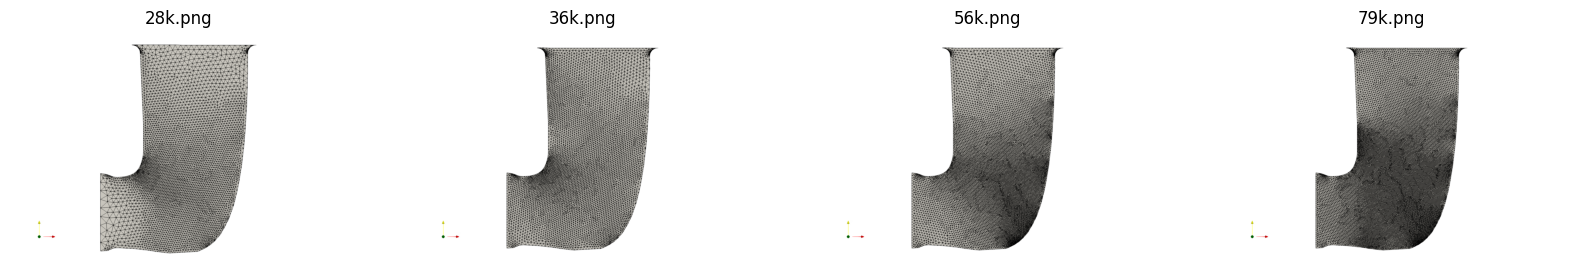

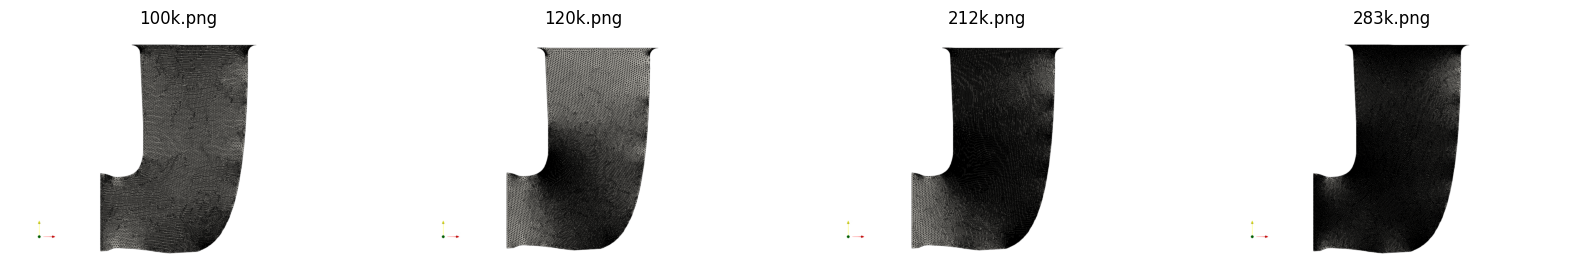

In [72]:
# Specify the directory where your CSV files are located
image_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Turbine_exit_bend/Left_bend/Corrected_schemes/corrected_data_files'

# List all files in the folder
files_image = os.listdir(image_path)

# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse = False)
print(png_files)

images = []

# Load the images and store them in the array
for png_file in png_files:
    image_path = os.path.join(folder_path, png_file)
    image = Image.open(image_path)
    images.append(np.array(image))

# Define the specific image indices you want to display
image_indices = [4, 5, 6, 7]  

fig, axes = plt.subplots(1, 4, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

# Define the specific image indices you want to display
image_indices = [0, 1, 2, 3]  

fig, axes = plt.subplots(1, 4, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

### Cell centers

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import os


# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Turbine_exit_bend/Left_bend/Corrected_schemes/79k_unstruct'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)


['inlet_face_centers.csv', 'inlet_face_pressures.csv', 'inlet_face_velocities.csv', 'inlet_paraview.csv', 'outlet_face_centers.csv', 'outlet_face_pressures.csv', 'outlet_face_velocities.csv', 'outlet_paraview.csv']


#### Face center coordinates and paraview coordinates

In [48]:
# Read the first CSV file with the full path

df = pd.read_csv(os.path.join(folder_path, csv_files[0]), skiprows=[0])
inlet_face_coors = np.zeros((df.shape[0], df.shape[1]), dtype = np.float64)
inlet_face_coors[:,0] = df.iloc[:,0]

df = pd.read_csv(os.path.join(folder_path, csv_files[4]), skiprows=[0])
outlet_face_coors = np.zeros((df.shape[0], df.shape[1]), dtype = np.float64)
outlet_face_coors[:,0] = df.iloc[:,0]


df = pd.read_csv(os.path.join(folder_path, csv_files[3]), skiprows=[0])
inlet_paraview_coors = np.zeros((df.shape[0], df.shape[1]), dtype = np.float64)
inlet_paraview_coors[:,0] = df.iloc[:,4]

df = pd.read_csv(os.path.join(folder_path, csv_files[7]), skiprows=[0])
outlet_paraview_coors = np.zeros((df.shape[0], df.shape[1]), dtype = np.float64)
outlet_paraview_coors[:,0] = df.iloc[:,3]

#### Static pressures at inlet and outlet

In [49]:
df = pd.read_csv(os.path.join(folder_path, csv_files[1]), skiprows=[0])
inlet_static_pressure = np.zeros((df.shape[0], df.shape[1]), dtype = np.float64)
inlet_static_pressure[:,0] = df.iloc[:,1]

df = pd.read_csv(os.path.join(folder_path, csv_files[5]), skiprows=[0])
outlet_static_pressure = np.zeros((df.shape[0], df.shape[1]), dtype = np.float64)
outlet_static_pressure[:,0] = df.iloc[:,1]


df = pd.read_csv(os.path.join(folder_path, csv_files[3]), skiprows=[0])
inlet_static_pressure_paraview = np.zeros((df.shape[0], df.shape[1]), dtype = np.float64)
inlet_static_pressure_paraview[:,0] = df.iloc[:,2]

df = pd.read_csv(os.path.join(folder_path, csv_files[7]), skiprows=[0])
outlet_static_pressure_paraview = np.zeros((df.shape[0], df.shape[1]), dtype = np.float64)
outlet_static_pressure_paraview[:,0] = df.iloc[:,2]

#### Dynamic pressures at inlet and outlet

In [50]:
df = pd.read_csv(os.path.join(folder_path, csv_files[2]), skiprows=[0])
inlet_dynamic_pressure = np.zeros((df.shape[0], df.shape[1]), dtype = np.float64)
inlet_dynamic_pressure[:,0] = df.iloc[:,3]

df = pd.read_csv(os.path.join(folder_path, csv_files[6]), skiprows=[0])
outlet_dynamic_pressure = np.zeros((df.shape[0], df.shape[1]), dtype = np.float64)
outlet_dynamic_pressure[:,0] = df.iloc[:,3]


df = pd.read_csv(os.path.join(folder_path, csv_files[3]), skiprows=[0])
inlet_dynamic_pressure_paraview = np.zeros((df.shape[0], df.shape[1]), dtype = np.float64)
inlet_dynamic_pressure_paraview[:,0] = df.iloc[:,0]

df = pd.read_csv(os.path.join(folder_path, csv_files[7]), skiprows=[0])
outlet_dynamic_pressure_paraview = np.zeros((df.shape[0], df.shape[1]), dtype = np.float64)
outlet_dynamic_pressure_paraview[:,0] = df.iloc[:,0]

#### Mass flux at inlet and outlet

In [51]:
df = pd.read_csv(os.path.join(folder_path, csv_files[2]), skiprows=[0])
inlet_mass_flux_inlet = np.zeros((df.shape[0], df.shape[1]), dtype = np.float64)
inlet_mass_flux_inlet[:,0] = df.iloc[:,4]

df = pd.read_csv(os.path.join(folder_path, csv_files[6]), skiprows=[0])
outlet_mass_flux = np.zeros((df.shape[0], df.shape[1]), dtype = np.float64)
outlet_mass_flux[:,0] = df.iloc[:,4]


df = pd.read_csv(os.path.join(folder_path, csv_files[3]), skiprows=[0])
inlet_mass_flux_inlet_paraview = np.zeros((df.shape[0], df.shape[1]), dtype = np.float64)
inlet_mass_flux_inlet_paraview[:,0] = df.iloc[:,1]

df = pd.read_csv(os.path.join(folder_path, csv_files[7]), skiprows=[0])
outlet_mass_flux_paraview = np.zeros((df.shape[0], df.shape[1]), dtype = np.float64)
outlet_mass_flux_paraview[:,0] = df.iloc[:,1]

#### Plotting

Text(0.5, 1.0, 'mass flux comparison - Inlet')

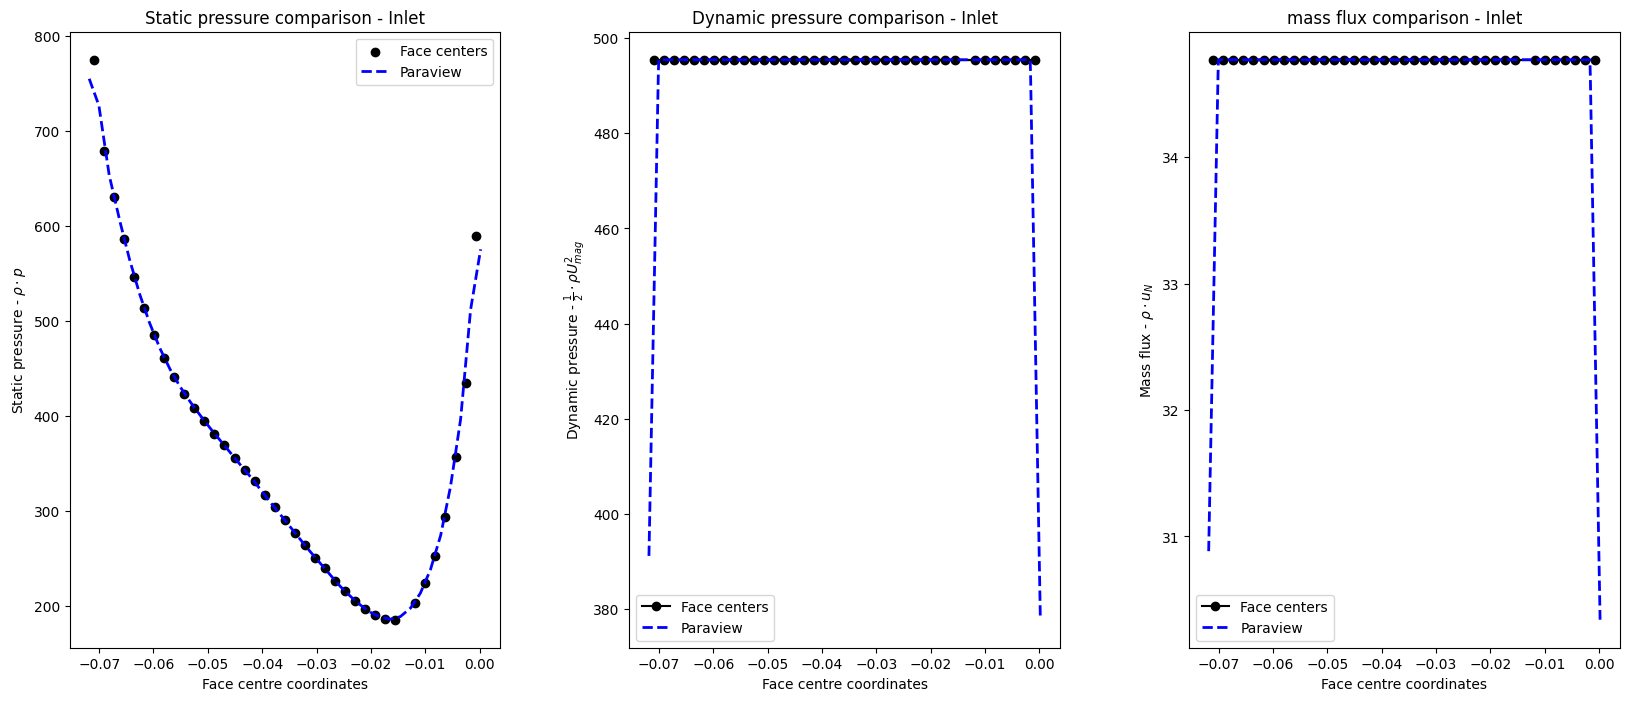

In [75]:
# Create a figure to display the contours
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize = (20, 8))  # Adjust the figsize as needed

# Adjust layout to prevent overlap and add space between rows
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust hspace and wspace as needed

ax1.scatter(inlet_face_coors[:,0], inlet_static_pressure[:,0], c = 'k', label = 'Face centers')
ax1.plot(inlet_paraview_coors[:,0], inlet_static_pressure_paraview[:,0], "b--", linewidth = 2, label = 'Paraview')
ax1.set_xlabel('Face centre coordinates'); ax1.set_ylabel(r"Static pressure - $\rho \cdot p$"); ax1.set_title('Static pressure comparison - Inlet'); ax1.legend()

ax2.plot(inlet_face_coors[:,0], inlet_dynamic_pressure[:,0], "k-o", linewidth = 1.5, label = 'Face centers')
ax2.plot(inlet_paraview_coors[:,0], inlet_dynamic_pressure_paraview[:,0], "b--", linewidth = 2, label = 'Paraview')
ax2.set_xlabel('Face centre coordinates'); ax2.set_ylabel(r"Dynamic pressure - $\frac{1}{2} \cdot \rho U_{mag}^2$"); ax2.legend(); ax2.set_title('Dynamic pressure comparison - Inlet')

ax3.plot(inlet_face_coors[:,0], inlet_mass_flux_inlet[:,0], "k-o", linewidth = 1.5, label = 'Face centers')
ax3.plot(inlet_paraview_coors[:,0], inlet_mass_flux_inlet_paraview[:,0], "b--", linewidth = 2, label = 'Paraview')
ax3.set_xlabel('Face centre coordinates'); ax3.set_ylabel(r"Mass flux - $\rho \cdot u_N$"); ax3.legend(); ax3.set_title('mass flux comparison - Inlet')

Text(0.5, 1.0, 'mass flux comparison - Outlet')

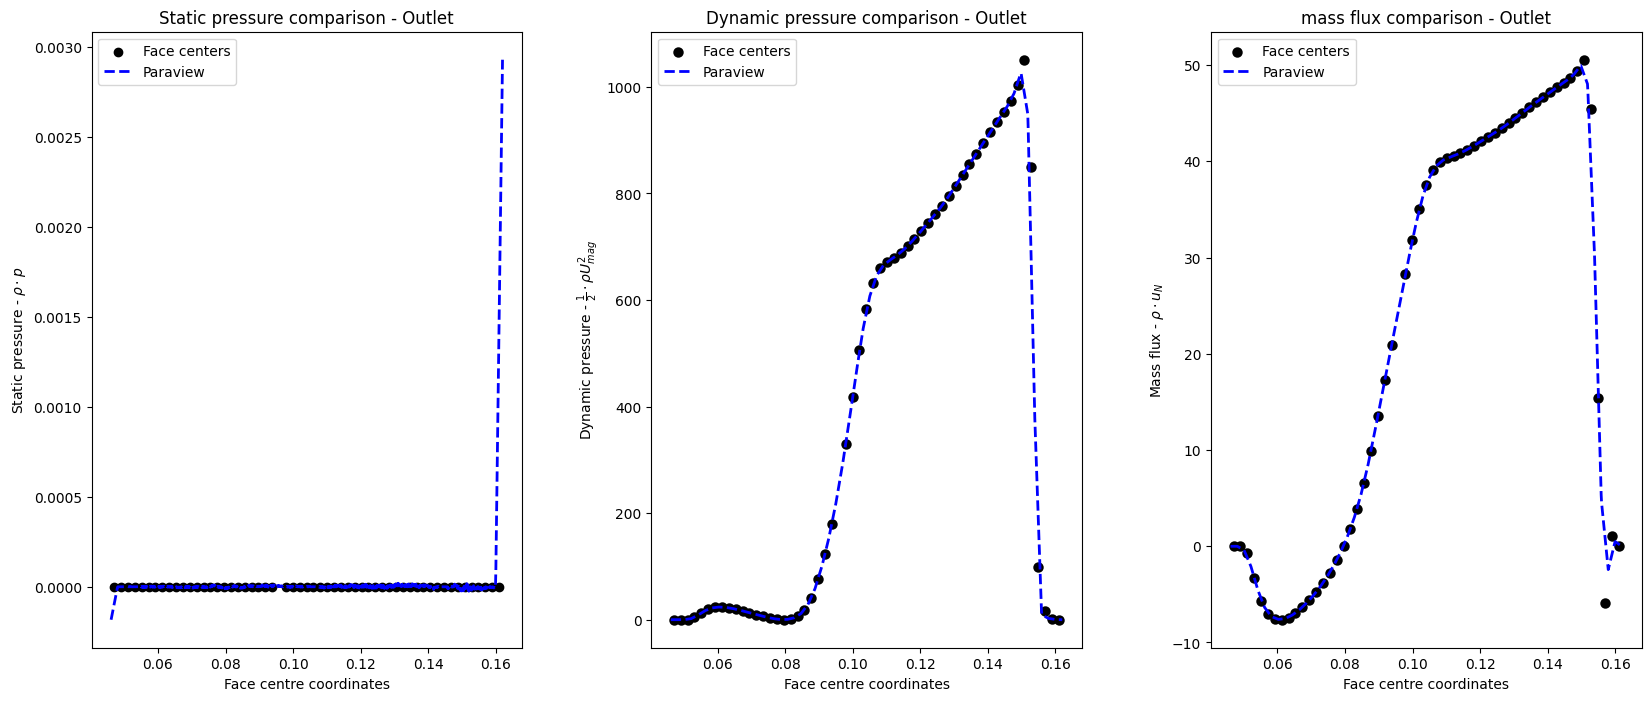

In [62]:
# Create a figure to display the contours
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize = (20, 8))  # Adjust the figsize as needed

# Adjust layout to prevent overlap and add space between rows
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust hspace and wspace as needed

ax1.scatter(outlet_face_coors[:,0], outlet_static_pressure[:,0], c = 'k', label = 'Face centers')
ax1.plot(outlet_paraview_coors[:,0], outlet_static_pressure_paraview[:,0], "b--", linewidth = 2, label = 'Paraview')
ax1.set_xlabel('Face centre coordinates'); ax1.set_ylabel(r"Static pressure - $\rho \cdot p$"); ax1.set_title('Static pressure comparison - Outlet'); ax1.legend()

ax2.scatter(outlet_face_coors[:,0], outlet_dynamic_pressure[:,0], c = 'k', linewidth = 1.5, label = 'Face centers')
ax2.plot(outlet_paraview_coors[:,0], outlet_dynamic_pressure_paraview[:,0], "b--", linewidth = 2, label = 'Paraview')
ax2.set_xlabel('Face centre coordinates'); ax2.set_ylabel(r"Dynamic pressure - $\frac{1}{2} \cdot \rho U_{mag}^2$"); ax2.legend(); ax2.set_title('Dynamic pressure comparison - Outlet')

ax3.scatter(outlet_face_coors[:,0], outlet_mass_flux[:,0], c = 'k', linewidth = 1.5, label = 'Face centers')
ax3.plot(outlet_paraview_coors[:,0], outlet_mass_flux_paraview[:,0], "b--", linewidth = 2, label = 'Paraview')
ax3.set_xlabel('Face centre coordinates'); ax3.set_ylabel(r"Mass flux - $\rho \cdot u_N$"); ax3.legend(); ax3.set_title('mass flux comparison - Outlet')

#### Cell centers - mesh comparison

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import os


# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Turbine_exit_bend/Left_bend/Corrected_schemes/corrected_data_files/cell_centers'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)


['120k_inlet.csv', '120k_outlet.csv', '212k_inlet.csv', '212k_outlet.csv', '36k_inlet.csv', '36k_outlet.csv', '79k_inlet.csv', '79k_outlet.csv']


In [65]:
# Read the first CSV file with the full path

df = pd.read_csv(os.path.join(folder_path, csv_files[4]), skiprows=[0])
k36_inlet = np.zeros((df.shape[0], 4), dtype = np.float64)

k36_inlet[:,0] = df.iloc[:,0]  # face coordinates
k36_inlet[:,1] = df.iloc[:,2]  # static pressure
k36_inlet[:,2] = df.iloc[:,6]  # dynamic pressure
k36_inlet[:,3] = df.iloc[:,7]  # mass flux inlet

df = pd.read_csv(os.path.join(folder_path, csv_files[5]), skiprows=[0])
k36_outlet = np.zeros((df.shape[0], 4), dtype = np.float64)

k36_outlet[:,0] = df.iloc[:,0]  # face coordinates
k36_outlet[:,1] = df.iloc[:,2]  # static pressure
k36_outlet[:,2] = df.iloc[:,6]  # dynamic pressure
k36_outlet[:,3] = df.iloc[:,7]  # mass flux inlet



df = pd.read_csv(os.path.join(folder_path, csv_files[6]), skiprows=[0])
k79_inlet = np.zeros((df.shape[0], 4), dtype = np.float64)

k79_inlet[:,0] = df.iloc[:,0]  # face coordinates
k79_inlet[:,1] = df.iloc[:,2]  # static pressure
k79_inlet[:,2] = df.iloc[:,6]  # dynamic pressure
k79_inlet[:,3] = df.iloc[:,7]  # mass flux inlet

df = pd.read_csv(os.path.join(folder_path, csv_files[7]), skiprows=[0])
k79_outlet = np.zeros((df.shape[0], 4), dtype = np.float64)

k79_outlet[:,0] = df.iloc[:,0]  # face coordinates
k79_outlet[:,1] = df.iloc[:,2]  # static pressure
k79_outlet[:,2] = df.iloc[:,6]  # dynamic pressure
k79_outlet[:,3] = df.iloc[:,7]  # mass flux inlet



df = pd.read_csv(os.path.join(folder_path, csv_files[0]), skiprows=[0])
k120_inlet = np.zeros((df.shape[0], 4), dtype = np.float64)

k120_inlet[:,0] = df.iloc[:,0]  # face coordinates
k120_inlet[:,1] = df.iloc[:,2]  # static pressure
k120_inlet[:,2] = df.iloc[:,6]  # dynamic pressure
k120_inlet[:,3] = df.iloc[:,7]  # mass flux inlet

df = pd.read_csv(os.path.join(folder_path, csv_files[1]), skiprows=[0])
k120_outlet = np.zeros((df.shape[0], 4), dtype = np.float64)

k120_outlet[:,0] = df.iloc[:,0]  # face coordinates
k120_outlet[:,1] = df.iloc[:,2]  # static pressure
k120_outlet[:,2] = df.iloc[:,6]  # dynamic pressure
k120_outlet[:,3] = df.iloc[:,7]  # mass flux inlet



df = pd.read_csv(os.path.join(folder_path, csv_files[2]), skiprows=[0])
k212_inlet = np.zeros((df.shape[0], 4), dtype = np.float64)

k212_inlet[:,0] = df.iloc[:,0]  # face coordinates
k212_inlet[:,1] = df.iloc[:,2]  # static pressure
k212_inlet[:,2] = df.iloc[:,6]  # dynamic pressure
k212_inlet[:,3] = df.iloc[:,7]  # mass flux inlet

df = pd.read_csv(os.path.join(folder_path, csv_files[3]), skiprows=[0])
k212_outlet = np.zeros((df.shape[0], 4), dtype = np.float64)

k212_outlet[:,0] = df.iloc[:,0]  # face coordinates
k212_outlet[:,1] = df.iloc[:,2]  # static pressure
k212_outlet[:,2] = df.iloc[:,6]  # dynamic pressure
k212_outlet[:,3] = df.iloc[:,7]  # mass flux inlet

#### Plotting

/tmp/ipykernel_5596/3998422572.py:8: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax1.scatter(k79_inlet[:, 0], k79_inlet[:, 1], c='b', marker='+', edgecolors='b', linewidths=2, label='Face centers - 79k')
/tmp/ipykernel_5596/3998422572.py:10: UserWarning: You passed a edgecolor/edgecolors ('g') for an unfilled marker ('1').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax1.scatter(k212_inlet[:, 0], k212_inlet[:, 1], c='g', marker='1', edgecolors='g', linewidths=1, label='Face centers - 212k')
/tmp/ipykernel_5596/3998422572.py:14: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(k79_inlet[:,0], k79_inlet[:,2], c='b', marker='+', ed

Text(0.5, 1.0, 'mass flux comparison - Inlet')

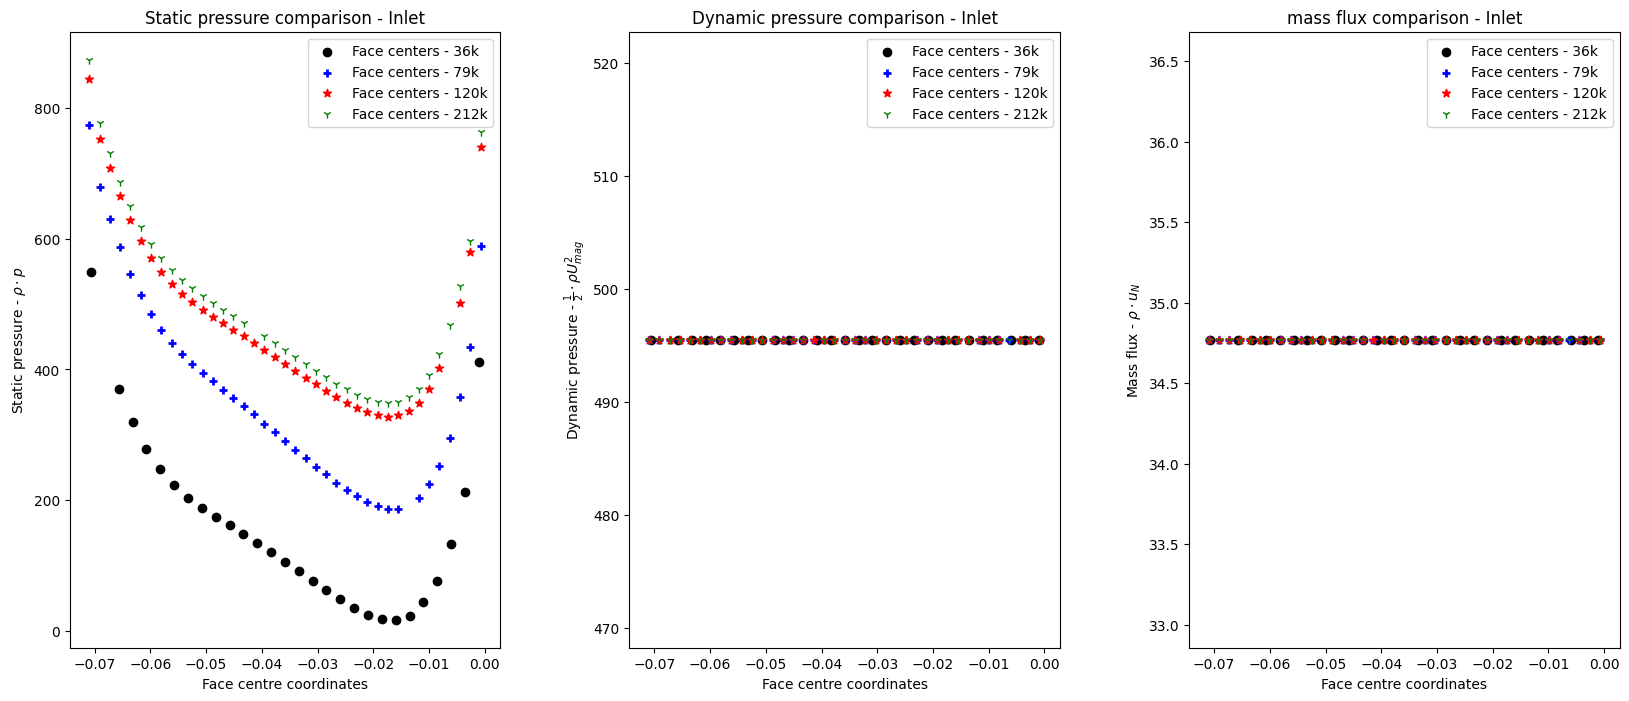

In [55]:
# Create a figure to display the contours
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize = (20, 8))  # Adjust the figsize as needed

# Adjust layout to prevent overlap and add space between rows
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust hspace and wspace as needed

ax1.scatter(k36_inlet[:,0], k36_inlet[:,1], c = 'k', label = 'Face centers - 36k')
ax1.scatter(k79_inlet[:, 0], k79_inlet[:, 1], c='b', marker='+', edgecolors='b', linewidths=2, label='Face centers - 79k')
ax1.scatter(k120_inlet[:, 0], k120_inlet[:, 1], c='r', marker='*', edgecolors='r', linewidths=1, label='Face centers - 120k')
ax1.scatter(k212_inlet[:, 0], k212_inlet[:, 1], c='g', marker='1', edgecolors='g', linewidths=1, label='Face centers - 212k')
ax1.set_xlabel('Face centre coordinates'); ax1.set_ylabel(r"Static pressure - $\rho \cdot p$"); ax1.set_title('Static pressure comparison - Inlet'); ax1.legend()

ax2.scatter(k36_inlet[:,0], k36_inlet[:,2], c = 'k', label = 'Face centers - 36k')
ax2.scatter(k79_inlet[:,0], k79_inlet[:,2], c='b', marker='+', edgecolors='b', linewidths=2, label='Face centers - 79k')
ax2.scatter(k120_inlet[:, 0], k120_inlet[:, 2], c='r', marker='*', edgecolors='r', linewidths=1, label='Face centers - 120k')
ax2.scatter(k212_inlet[:, 0], k212_inlet[:, 2], c='g', marker='1', edgecolors='g', linewidths=1, label='Face centers - 212k')
ax2.set_xlabel('Face centre coordinates'); ax2.set_ylabel(r"Dynamic pressure - $\frac{1}{2} \cdot \rho U_{mag}^2$"); ax2.legend(); ax2.set_title('Dynamic pressure comparison - Inlet')

ax3.scatter(k36_inlet[:,0], k36_inlet[:,3], c = 'k', label = 'Face centers - 36k')
ax3.scatter(k79_inlet[:,0], k79_inlet[:,3], c='b', marker='+', edgecolors='b', linewidths=2, label='Face centers - 79k')
ax3.scatter(k120_inlet[:, 0], k120_inlet[:, 3], c='r', marker='*', edgecolors='r', linewidths=1, label='Face centers - 120k')
ax3.scatter(k212_inlet[:, 0], k212_inlet[:, 3], c='g', marker='1', edgecolors='g', linewidths=1, label='Face centers - 212k')
ax3.set_xlabel('Face centre coordinates'); ax3.set_ylabel(r"Mass flux - $\rho \cdot u_N$"); ax3.legend(); ax3.set_title('mass flux comparison - Inlet')

/tmp/ipykernel_5596/215806593.py:8: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax1.scatter(k79_outlet[:, 0], k79_outlet[:, 1], c='b', marker='+', edgecolors='b', linewidths=2, label='Face centers - 79k')
/tmp/ipykernel_5596/215806593.py:10: UserWarning: You passed a edgecolor/edgecolors ('g') for an unfilled marker ('1').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax1.scatter(k212_outlet[:, 0], k212_outlet[:, 1], c='g', marker='1', edgecolors='g', linewidths=1, label='Face centers - 212k')
/tmp/ipykernel_5596/215806593.py:14: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(k79_outlet[:,0], k79_outlet[:,2], c='b', marker='+',

Text(0.5, 1.0, 'mass flux comparison - Outlet')

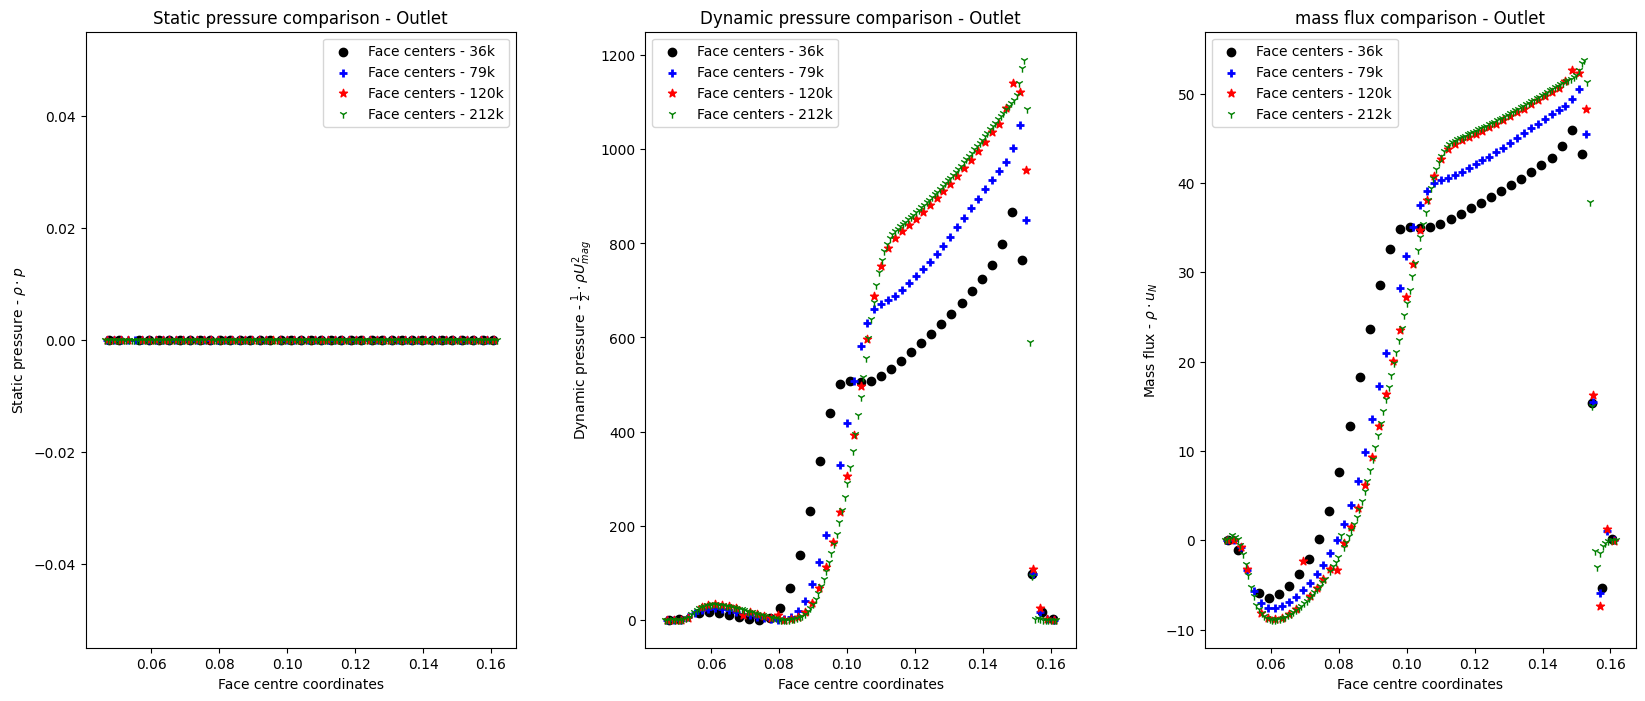

In [66]:
# Create a figure to display the contours
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize = (20, 8))  # Adjust the figsize as needed

# Adjust layout to prevent overlap and add space between rows
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust hspace and wspace as needed

ax1.scatter(k36_outlet[:,0], k36_outlet[:,1], c = 'k', label = 'Face centers - 36k')
ax1.scatter(k79_outlet[:, 0], k79_outlet[:, 1], c='b', marker='+', edgecolors='b', linewidths=2, label='Face centers - 79k')
ax1.scatter(k120_outlet[:, 0], k120_outlet[:, 1], c='r', marker='*', edgecolors='r', linewidths=1, label='Face centers - 120k')
ax1.scatter(k212_outlet[:, 0], k212_outlet[:, 1], c='g', marker='1', edgecolors='g', linewidths=1, label='Face centers - 212k')
ax1.set_xlabel('Face centre coordinates'); ax1.set_ylabel(r"Static pressure - $\rho \cdot p$"); ax1.set_title('Static pressure comparison - Outlet'); ax1.legend()

ax2.scatter(k36_outlet[:,0], k36_outlet[:,2], c = 'k', label = 'Face centers - 36k')
ax2.scatter(k79_outlet[:,0], k79_outlet[:,2], c='b', marker='+', edgecolors='b', linewidths=2, label='Face centers - 79k')
ax2.scatter(k120_outlet[:, 0], k120_outlet[:, 2], c='r', marker='*', edgecolors='r', linewidths=1, label='Face centers - 120k')
ax2.scatter(k212_outlet[:, 0], k212_outlet[:, 2], c='g', marker='1', edgecolors='g', linewidths=1, label='Face centers - 212k')
ax2.set_xlabel('Face centre coordinates'); ax2.set_ylabel(r"Dynamic pressure - $\frac{1}{2} \cdot \rho U_{mag}^2$"); ax2.legend(); ax2.set_title('Dynamic pressure comparison - Outlet')

ax3.scatter(k36_outlet[:,0], k36_outlet[:,3], c = 'k', label = 'Face centers - 36k')
ax3.scatter(k79_outlet[:,0], k79_outlet[:,3], c='b', marker='+', edgecolors='b', linewidths=2, label='Face centers - 79k')
ax3.scatter(k120_outlet[:, 0], k120_outlet[:, 3], c='r', marker='*', edgecolors='r', linewidths=1, label='Face centers - 120k')
ax3.scatter(k212_outlet[:, 0], k212_outlet[:, 3], c='g', marker='1', edgecolors='g', linewidths=1, label='Face centers - 212k')
ax3.set_xlabel('Face centre coordinates'); ax3.set_ylabel(r"Mass flux - $\rho \cdot u_N$"); ax3.legend(); ax3.set_title('mass flux comparison - Outlet')

#### Bend with the environmental domain

In [62]:
import gmsh
import sys
import meshio
import os

z_coor = 0
lc_set = 1
scale_factor = 1000

def read_points_from_file(filename):
    points = []
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith("Point"):
                parts = line.split("{")[1].split("}")[0].split(",")
                x, y, z, lc = map(float, parts)
                x/= scale_factor
                y/= scale_factor
                z/= scale_factor
                points.append((z, y, z_coor, lc_set))

    return points

def add_points_and_lines_to_gmsh(points):
    gmsh.initialize()
    gmsh.model.add("points_model")

    point_tags = []
    # Add points to Gmsh
    for i, (x, y, z, lc) in enumerate(points, start=1):
        tag_points = gmsh.model.geo.addPoint(x, y, z, lc, i)
        point_tags.append(tag_points)

    # print(point_tags)

    # Add lines between successive points
    line_tags = []
    for i in range(len(point_tags) - 1):
        tag_lines = gmsh.model.geo.addLine(point_tags[i], point_tags[i + 1])
        line_tags.append(tag_lines)

    tag_lines = gmsh.model.geo.addLine(point_tags[-1], point_tags[0])
    line_tags.append(tag_lines)

    gmsh.model.geo.synchronize()


    # 36k improved
    
    gmsh.model.geo.mesh.setTransfiniteCurve(43, 60, "Progression", 1) # 50
    gmsh.model.geo.mesh.setTransfiniteCurve(42, 30, "Progression", 1) # 50

    # Approximately 0.78 mm / edge length at the outlet (116 mm)
    gmsh.model.geo.mesh.setTransfiniteCurve(70, 116, "Progression", 1)

    gmsh.model.geo.mesh.setTransfiniteCurve(169, 25, "Progression", 1)

    # Approximately 1.8mm / edge length at the inlet (72 mm)
    gmsh.model.geo.mesh.setTransfiniteCurve(196, 72, "Progression", 1)

    gmsh.model.geo.mesh.setTransfiniteCurve(174, 3, "Progression", 1)
    for l in range(171,189):
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 3, "Progression", 1)
    for l in range(23,42):
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 3, "Progression", 1)
    for l in range(94,169):
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 3, "Progression", 1)
    for l in [95,100,97]:
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 5, "Progression", 1)
    for l in range(170,174):
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 3, "Progression", 1)

    gmsh.model.geo.mesh.setTransfiniteCurve(195, 4, "Progression", 1)

    gmsh.model.geo.addPoint(-5, 0.1197, z_coor, lc, 197)
    gmsh.model.geo.addPoint(7.5, 0.1196, z_coor, lc, 198)
    gmsh.model.geo.addPoint(-5, 10, z_coor, lc, 199)
    gmsh.model.geo.addPoint(7.5, 10, z_coor, lc, 200)
    gmsh.model.geo.addPoint(0.046, 0.01, z_coor, lc, 201)
    gmsh.model.geo.addPoint(7.5, -0.5, z_coor, lc, 202)
    gmsh.model.geo.addPoint(-5, -0.1, z_coor, lc, 203)
    gmsh.model.geo.addPoint(0.162, -0.1, z_coor, lc, 204)

    gmsh.model.geo.addLine(197, 70, 197)
    gmsh.model.geo.addLine(71, 198, 198)
    gmsh.model.geo.addLine(198, 200, 199)
    gmsh.model.geo.addLine(200, 199, 200)
    gmsh.model.geo.addLine(199, 197, 201)

    gmsh.model.geo.addLine(70, 201, 202)
    gmsh.model.geo.addLine(201, 203, 203)
    gmsh.model.geo.addLine(203, 197, 204)

    gmsh.model.geo.addLine(198, 202, 205)
    gmsh.model.geo.addLine(202, 204, 206)
    gmsh.model.geo.addLine(204, 71, 207)

    for l in [198]:
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 150, "Progression", 1.04)
    gmsh.model.geo.mesh.setTransfiniteCurve(197, 150, "Progression", 1/1.04)
    gmsh.model.geo.mesh.setTransfiniteCurve(201, 50, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(199, 50, "Progression", 1.0)
    gmsh.model.geo.mesh.setTransfiniteCurve(200, 35, "Progression", 1)

    gmsh.model.geo.mesh.setTransfiniteCurve(206, 100, "Progression", 0.96)
    gmsh.model.geo.mesh.setTransfiniteCurve(207, 35, "Progression", 0.92)
    for l in [204]:
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 2, "Progression", 1)
    gmsh.model.geo.mesh.setTransfiniteCurve(202, 35, "Progression", 1.02)
    gmsh.model.geo.mesh.setTransfiniteCurve(203, 150, "Progression", 1.02)
    gmsh.model.geo.mesh.setTransfiniteCurve(205, 8, "Progression", 1.05)
    
    # Mesh refinement - 145k

    # gmsh.model.geo.mesh.setTransfiniteCurve(43, 15, "Progression", 1)
    # gmsh.model.geo.mesh.setTransfiniteCurve(42, 20, "Progression", 1)
    # gmsh.model.geo.mesh.setTransfiniteCurve(70, 20, "Progression", 1)
    # gmsh.model.geo.mesh.setTransfiniteCurve(169, 20, "Progression", 1)
    # gmsh.model.geo.mesh.setTransfiniteCurve(196, 15, "Progression", 1)
    # for l in range(23,42):
    #     gmsh.model.geo.mesh.setTransfiniteCurve(l, 5, "Progression", 1)
    # for l in range(96,169):
    #     gmsh.model.geo.mesh.setTransfiniteCurve(l, 5, "Progression", 1)
    # named_surfaces = [43, 42, 70, 169, 196]
    # remaining_surfaces = [s for s in surface_ids if s not in named_surfaces]


    # Make a closed curve loop between the lines
    print(line_tags[-1])
    gmsh.model.geo.addCurveLoop(line_tags, 1)
    gmsh.model.geo.addCurveLoop([197, 70, 198, 199, 200, 201], 2)
    gmsh.model.geo.addCurveLoop([197, 202, 203, 204], 3)
    gmsh.model.geo.addCurveLoop([198, 205, 206, 207], 4)

    gmsh.model.geo.addPlaneSurface([1], 3)
    gmsh.model.geo.addPlaneSurface([2], 4)
    gmsh.model.geo.addPlaneSurface([3], 5)
    gmsh.model.geo.addPlaneSurface([4], 6)

    gmsh.model.geo.synchronize()

    # # Hide points
    # for tag in point_tags:
    #     gmsh.model.setVisibility([(0, tag)], False)

    # # Ensure lines are visible
    # for tag in line_tags:
    #     gmsh.model.setVisibility([(1, tag)], True)

    gmsh.model.geo.synchronize()

    # Extrusion
    layers = 1; extrude_height = 0.3; extrude_vector = [0, 0, extrude_height];
    ex = gmsh.model.geo.extrude([(2, 3), (2, 4), (2, 5), (2, 6)], extrude_vector[0], extrude_vector[1], extrude_vector[2], numElements = [layers], recombine = True)

    gmsh.model.geo.synchronize()

    surface_ids = sorted([e[1] for e in ex if e[0] == 2])
    volume_ids = sorted([e[1] for e in ex if e[0] == 3])

    # # # List of surfaces to display
    # # surfaces_to_display = [surface_ids[0], surface_ids[20]]

    print(surface_ids, volume_ids)
    gmsh.model.addPhysicalGroup(3, volume_ids, 1)
    gmsh.model.setPhysicalName(3, 1, "Fluid")
    gmsh.model.addPhysicalGroup(2, [1188], 2)
    gmsh.model.setPhysicalName(2, 2, "Inlet")
    gmsh.model.addPhysicalGroup(2, [1216], 3)
    gmsh.model.setPhysicalName(2, 3, "Outlet")
    gmsh.model.addPhysicalGroup(2, [3, 4, 5, 6, 1221, 1189, 1265, 1243], 4)
    gmsh.model.setPhysicalName(2, 4, "Sides")
    gmsh.model.addPhysicalGroup(2, [1234, 1264, 1238, 1260, 1220, 1242, 1212, 1256], 5)
    gmsh.model.setPhysicalName(2, 5, "Wall_upper")
    named_surfaces = [1188, 1216, 3, 4, 5, 6, 1221, 1189, 1265, 1243, 1220, 1242, 1238, 1234, 1260, 1256, 1212, 1264, 1200, 684, 1208]
    remaining_surfaces = [s for s in surface_ids if s not in named_surfaces]
    gmsh.model.addPhysicalGroup(2, remaining_surfaces, 6)
    gmsh.model.setPhysicalName(2, 6, "Walls")

    # # for surface in surface_ids:
    # #     gmsh.model.setVisibility([(2, surface)], False)

    # # for surface_id in surfaces_to_display:
    # #     gmsh.model.setVisibility([(2, surface_id)], True)

    # Mesh Generation
    gmsh.model.mesh.generate(3)

    mesh_file = os.path.abspath("bend_environment_XXL.msh2")
    gmsh.write(mesh_file)

    # Launch the GUI to see the results:
    if '-nopopup' not in sys.argv:
        gmsh.fltk.run()

    gmsh.finalize()

    # Saving the mesh file, and opening it
    # mesh = meshio.read(mesh_file)

    # # Extract only the necessary parts of the mesh to avoid issues with cell sets
    # cells = [(cell_block.type, cell_block.data) for cell_block in mesh.cells]

    # # Create a new mesh object without cell sets
    # mesh_clean = meshio.Mesh(points=mesh.points, cells=cells)

    # meshio.write("36k_unstruct.vtk", mesh_clean)

if __name__ == "__main__":
    filename = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Turbine_exit_bend/coors.txt'
    points = read_points_from_file(filename)
    add_points_and_lines_to_gmsh(points)


196
[408, 412, 416, 420, 424, 428, 432, 436, 440, 444, 448, 452, 456, 460, 464, 468, 472, 476, 480, 484, 488, 492, 496, 500, 504, 508, 512, 516, 520, 524, 528, 532, 536, 540, 544, 548, 552, 556, 560, 564, 568, 572, 576, 580, 584, 588, 592, 596, 600, 604, 608, 612, 616, 620, 624, 628, 632, 636, 640, 644, 648, 652, 656, 660, 664, 668, 672, 676, 680, 684, 684, 688, 692, 696, 700, 704, 708, 712, 716, 720, 724, 728, 732, 736, 740, 744, 748, 752, 756, 760, 764, 768, 772, 776, 780, 784, 788, 792, 796, 800, 804, 808, 812, 816, 820, 824, 828, 832, 836, 840, 844, 848, 852, 856, 860, 864, 868, 872, 876, 880, 884, 888, 892, 896, 900, 904, 908, 912, 916, 920, 924, 928, 932, 936, 940, 944, 948, 952, 956, 960, 964, 968, 972, 976, 980, 984, 988, 992, 996, 1000, 1004, 1008, 1012, 1016, 1020, 1024, 1028, 1032, 1036, 1040, 1044, 1048, 1052, 1056, 1060, 1064, 1068, 1072, 1076, 1080, 1084, 1088, 1092, 1096, 1100, 1104, 1108, 1112, 1116, 1120, 1124, 1128, 1132, 1136, 1140, 1144, 1148, 1152, 1156, 1160, 1164